# 서울시 코로나 발생 동향 분석
* http://www.seoul.go.kr/coronaV/coronaStatus.do 
* 서울시 코로나19 웹페이지의 테이블을 크롤링하여 2020/01/24 부터 2020/07/31 까지의 데이터를 분석에 활용

# 라이브러리 로드

In [408]:
# 라이브러리 로드 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np 
import warnings

# warnings 메세지 무시
warnings.filterwarnings(action='ignore') 


# 노트북에 그래프를 출력하기위해 
%matplotlib inline

# 시각화 선명하게 설정
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

# 폰트 설정 
plt.rc('font', family="Malgun Gothic")
# 플롯 스타일
# plt.style.use("fivethirtyeight")

# 출력되는 행, 컬럼 조정
pd.options.display.max_columns = 10
pd.options.display.max_rows =10

In [409]:
# 2020/7/31 까지의 크롤링 데이터를 저장해놓은 파일 로드
df = pd.read_csv('data/seoul-covid19_7_31_.csv', encoding='utf-8')
df

,연번,환자,확진일,거주지,여행력,접촉력,조치사항
0,1605,14360,7.31.,마포구,-,확인 중,서울대학교병원
1,1602,14332,7.31.,서초구,-,확인 중,서울성모병원
2,1601,14325,7.30.,은평구,-,확인 중,서울의료원
3,1600,14303,7.30.,송파구,-,송파구 확진자 접촉,보라매병원
4,1599,14300,7.30.,강동구,-,강남구 사무실 K빌딩,서울의료원
...,...,...,...,...,...,...,...
1598,5,9,1.31.,성북구,-,#5 접촉,서울의료원(퇴원)
1599,4,7,1.30.,마포구,중국 우한시,해외 접촉,서울의료원(퇴원)
1600,3,6,1.30.,종로구,-,#3 접촉,서울대학교병원(퇴원)
1601,2,5,1.30.,중랑구,중국 우한시,해외 접촉,서울의료원(퇴원)


In [410]:
df.shape

(1603, 7)

# 요약

In [411]:
df.shape

(1603, 7)

In [412]:
df["연번"].nunique()

1603

In [413]:
print(df["확진일"].min(),
df["확진일"].max())

1.24. 7.31.


In [414]:
df.columns

Index(['연번', '환자', '확진일', '거주지', '여행력', '접촉력', '조치사항'], dtype='object')

서울지역에서 첫 확진자가 발생한 날 01.24 부터 07.31 까지의 1603명 확진자의 '연번', '환자', '확진일', '거주지', '여행력', '접촉력', '조치사항' 를 포함한 데이터

# 확진일

## 확진일 컬럼 전처리

In [415]:
# "확진일" 컬럼을 분석의 편의를 위해 datetime 타입으로 변환 

df["확진일자"] = pd.to_datetime("2020." + df["확진일"])


In [416]:
# "월", "주" 컬럼생성

df["월"] = df["확진일자"].dt.month
df["주"] = df["확진일자"].dt.week
df

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주
0,1605,14360,7.31.,마포구,-,확인 중,서울대학교병원,2020-07-31,7,31
1,1602,14332,7.31.,서초구,-,확인 중,서울성모병원,2020-07-31,7,31
2,1601,14325,7.30.,은평구,-,확인 중,서울의료원,2020-07-30,7,31
3,1600,14303,7.30.,송파구,-,송파구 확진자 접촉,보라매병원,2020-07-30,7,31
4,1599,14300,7.30.,강동구,-,강남구 사무실 K빌딩,서울의료원,2020-07-30,7,31
...,...,...,...,...,...,...,...,...,...,...
1598,5,9,1.31.,성북구,-,#5 접촉,서울의료원(퇴원),2020-01-31,1,5
1599,4,7,1.30.,마포구,중국 우한시,해외 접촉,서울의료원(퇴원),2020-01-30,1,5
1600,3,6,1.30.,종로구,-,#3 접촉,서울대학교병원(퇴원),2020-01-30,1,5
1601,2,5,1.30.,중랑구,중국 우한시,해외 접촉,서울의료원(퇴원),2020-01-30,1,5


In [417]:
df[["확진일", "확진일자", "월", "주"]]

,확진일,확진일자,월,주
0,7.31.,2020-07-31,7,31
1,7.31.,2020-07-31,7,31
2,7.30.,2020-07-30,7,31
3,7.30.,2020-07-30,7,31
4,7.30.,2020-07-30,7,31
...,...,...,...,...
1598,1.31.,2020-01-31,1,5
1599,1.30.,2020-01-30,1,5
1600,1.30.,2020-01-30,1,5
1601,1.30.,2020-01-30,1,5


In [418]:
days_count = df["확진일자"].value_counts()
days_count.to_frame("확진자수").head()

,확진자수
2020-03-10,46
2020-06-12,30
2020-06-06,29
2020-06-05,27
2020-03-09,26


최다 확진 : 3월 10일 확진자 수 46명 

In [419]:
# 데이터프레임으로 만들어주기 
df_days_count = days_count.to_frame("확진자수")
df_days_count.sort_index()

,확진자수
2020-01-24,1
2020-01-30,3
2020-01-31,3
2020-02-02,1
2020-02-05,2
...,...
2020-07-27,6
2020-07-28,9
2020-07-29,3
2020-07-30,9


확진자가 발생하지 않은 날은 데이터에 빠져있음


## 모든일자 만들어주기

In [420]:
# 첫날부터 마지막 날까지의 날짜 만들어주기 
last_day = df.loc[0, "확진일자"]
first_day = df.loc[1602, "확진일자"]


In [421]:
days = pd.date_range(first_day, last_day)
days

DatetimeIndex(['2020-01-24', '2020-01-25', '2020-01-26', '2020-01-27',
               '2020-01-28', '2020-01-29', '2020-01-30', '2020-01-31',
               '2020-02-01', '2020-02-02',
               ...
               '2020-07-22', '2020-07-23', '2020-07-24', '2020-07-25',
               '2020-07-26', '2020-07-27', '2020-07-28', '2020-07-29',
               '2020-07-30', '2020-07-31'],
              dtype='datetime64[ns]', length=190, freq='D')

In [422]:
# 데이터 프레임으로 만들어주기 
df_days = pd.DataFrame(days).rename(columns={0:"확진일자"})
df_days

,확진일자
0,2020-01-24
1,2020-01-25
2,2020-01-26
3,2020-01-27
4,2020-01-28
...,...
185,2020-07-27
186,2020-07-28
187,2020-07-29
188,2020-07-30


In [423]:
# merge로 합쳐주기 

df_days_all = df_days.merge(df_days_count, left_on="확진일자"
              ,right_index =True, how = "left")

# df_days_all = df_days_all.set_index("확진일자")
df_days_all

,확진일자,확진자수
0,2020-01-24,1.0
1,2020-01-25,NaN
2,2020-01-26,NaN
3,2020-01-27,NaN
4,2020-01-28,NaN
...,...,...
185,2020-07-27,6.0
186,2020-07-28,9.0
187,2020-07-29,3.0
188,2020-07-30,9.0


In [424]:
# 누적 확진자수 만들어주기 
df_days_all = df_days_all.fillna(0)
df_days_all["누적확진자수"] = df_days_all["확진자수"].cumsum()
df_days_all[["확진자수", "누적확진자수"]] = df_days_all[["확진자수", "누적확진자수"]].astype(int)
df_days_all = df_days_all.set_index("확진일자")
df_days_all

,확진자수,누적확진자수
확진일자,,
2020-01-24,1,1
2020-01-25,0,1
2020-01-26,0,1
2020-01-27,0,1
2020-01-28,0,1
...,...,...
2020-07-27,6,1580
2020-07-28,9,1589
2020-07-29,3,1592


## 일별 / 누적 확진자수

### 일별 확진자수 시각화

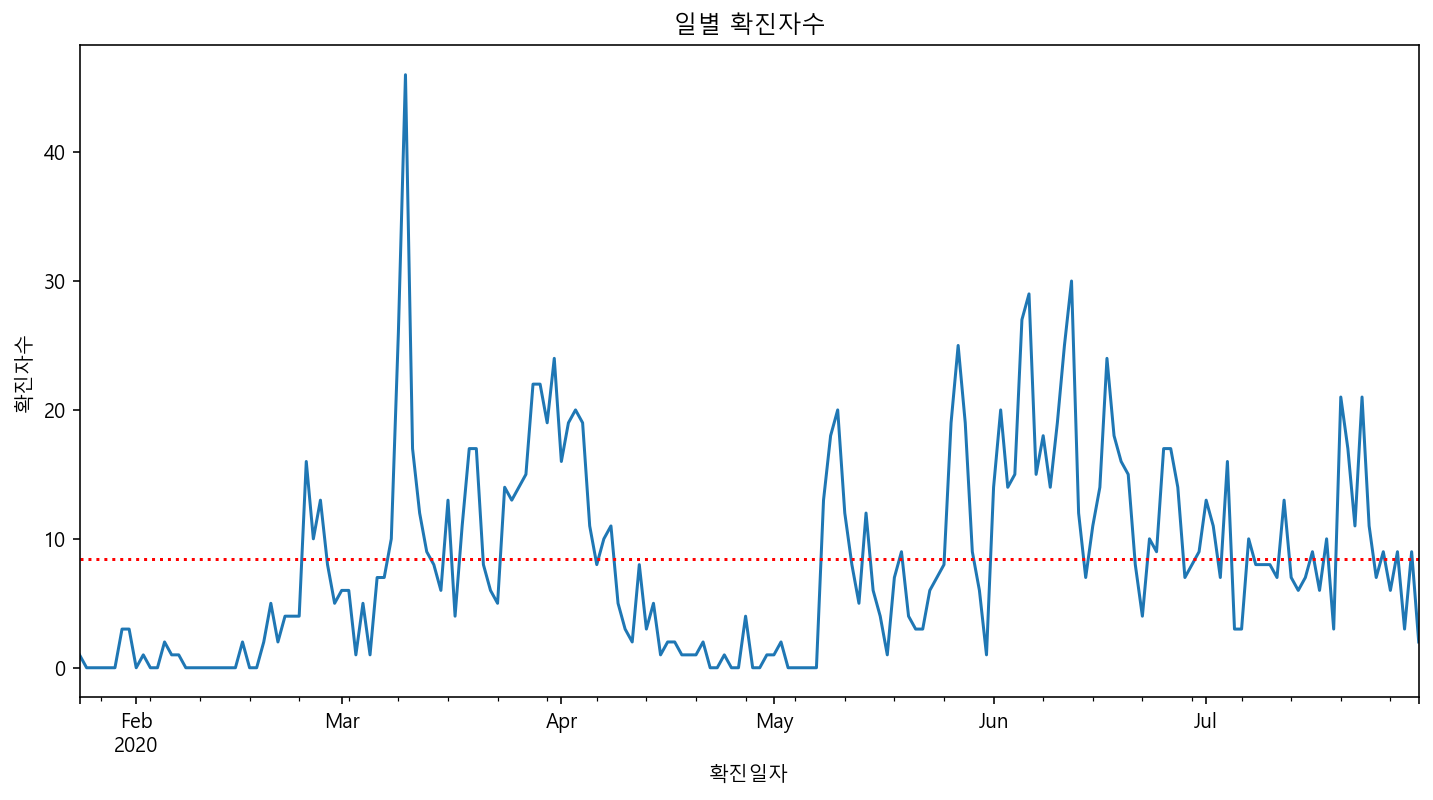

In [425]:
# 일별확진자수 시각화 
g = df_days_all["확진자수"].plot(figsize=(12,6))
plt.axhline(df_days_all["확진자수"].mean(), color='red', linestyle=":")
plt.title("일별 확진자수")
plt.ylabel('확진자수')
plt.show()

빨간 표시선은 일평균 확진자수

In [426]:
df_days_all["확진자수"].describe()

count    190.000000
mean       8.436842
std        7.711306
min        0.000000
25%        2.000000
50%        7.000000
75%       13.000000
max       46.000000
Name: 확진자수, dtype: float64

일평균 확진자수는 8.4명, 중앙값은 7명, 일 최대 확진자 수는 46명.
일 확진자 수 편차가 매우 크다.

### 누적확진자수 시각화

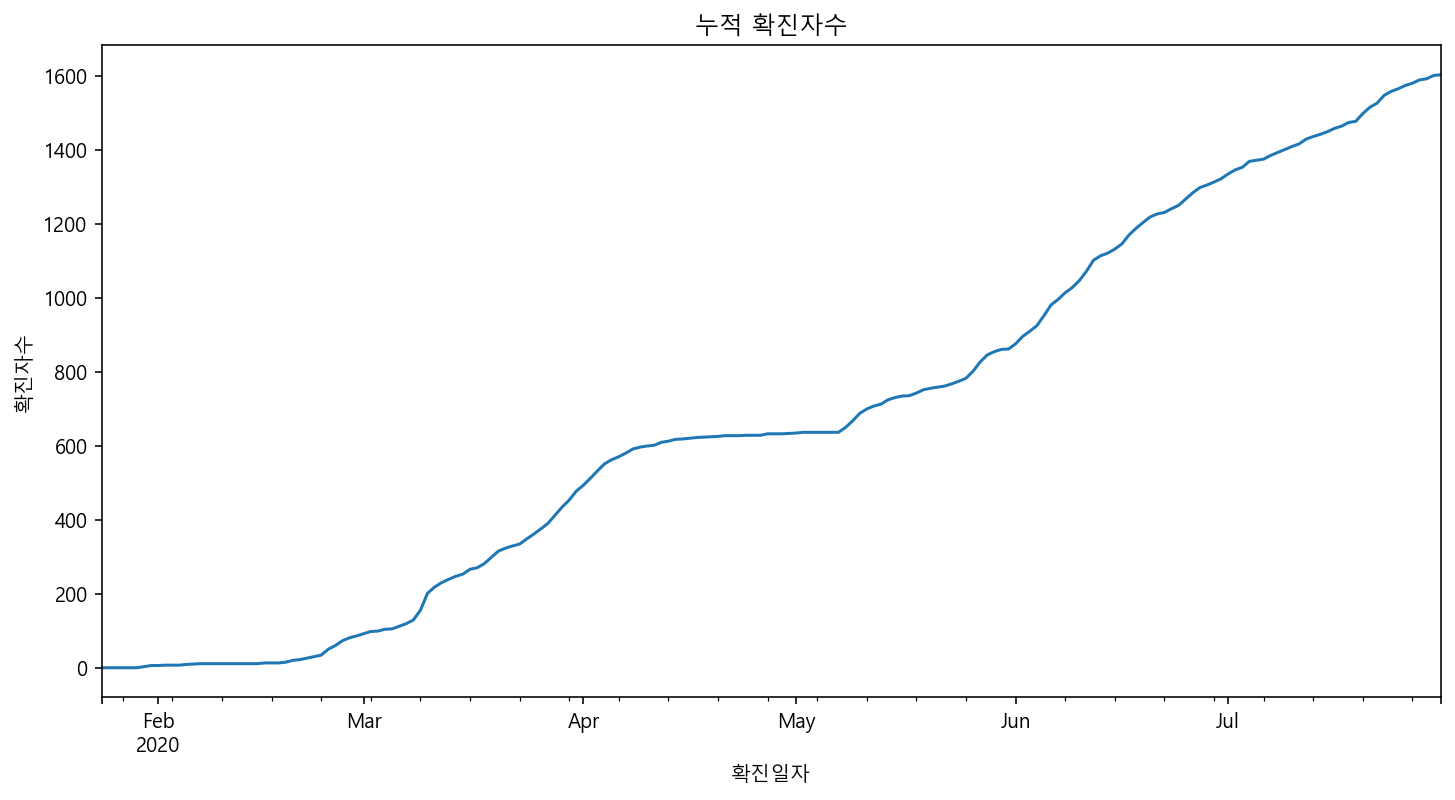

In [427]:
# 누적확진자수 시각화
g= df_days_all["누적확진자수"].plot(figsize=(12,6))
plt.title("누적 확진자수")
plt.ylabel('확진자수')
plt.show()

3월, 6월에 급격하게 증가, 4월달은 증가 폭이 작음.

## 월별 확진자수 

In [428]:
monthly_count = df["월"].value_counts().sort_index()
monthly_count

1      7
2     80
3    391
4    156
5    228
6    460
7    281
Name: 월, dtype: int64

In [429]:
monthly_count.describe()

count      7.000000
mean     229.000000
std      162.851671
min        7.000000
25%      118.000000
50%      228.000000
75%      336.000000
max      460.000000
Name: 월, dtype: float64

월평균 확진자수 229, 중앙값 228, 최대 확진자 수 460명

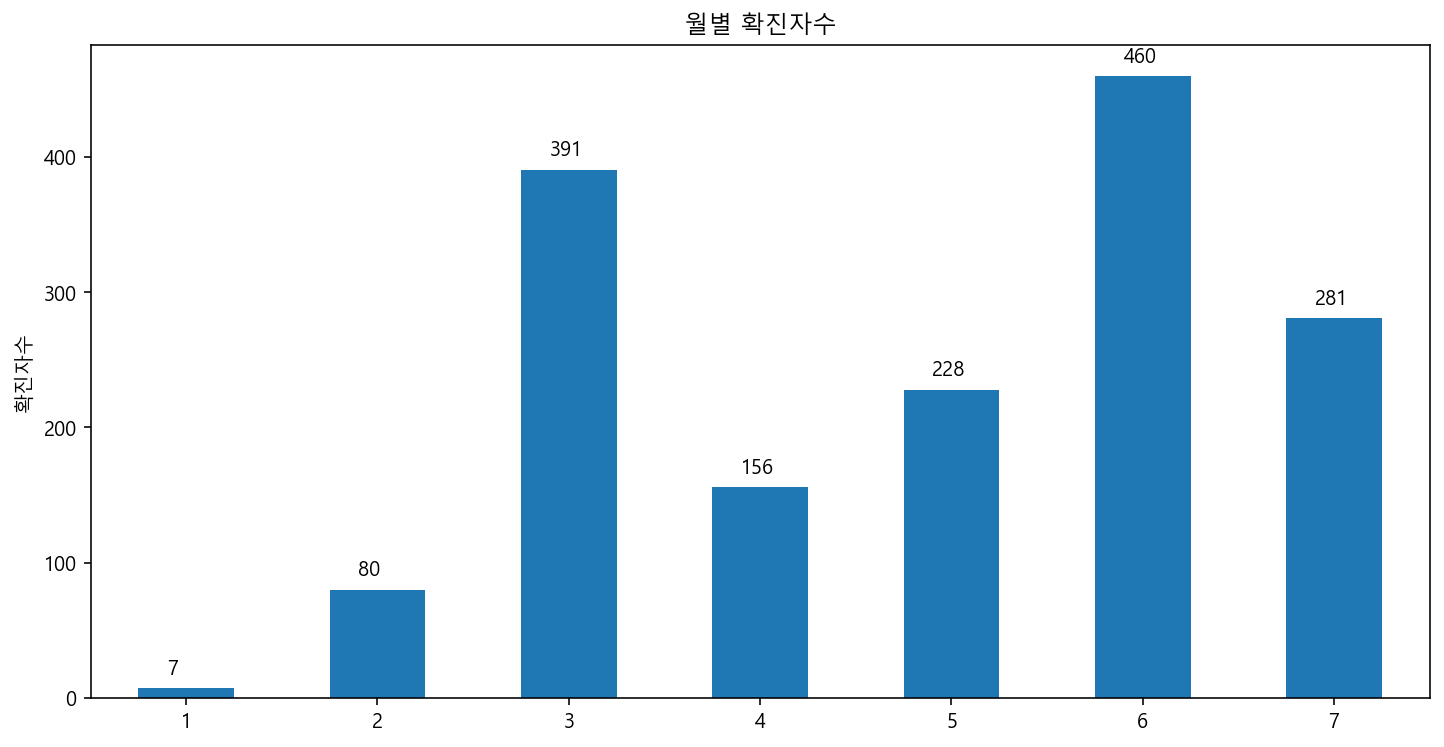

In [430]:
g = monthly_count.plot.bar(figsize=(12,6), rot=0)
# plt.axhline(monthly_count.mean(), color='red', linestyle=":")

for i in range(len(monthly_count)) : 
    case_count = monthly_count.iloc[i]
    g.text(x=i-0.1, y= case_count+10,  s= case_count)

plt.title("월별 확진자수")
plt.ylabel('확진자수')
plt.show()

6월, 3월, 7월 순으로 확진자 수가 많다.

### 3월, 6월의 이슈 사항 
* 확진자가 대량으로 발생한 원인을 살펴본다

In [431]:
df[df["월"] == 3]["접촉력"].value_counts().head()

해외 접촉 추정      121
구로구 콜센터 관련     60
콜센터직원 접촉       36
구로구 교회 관련      35
동대문구 관련        28
Name: 접촉력, dtype: int64

3월 : 해외, 콜센터, 교회 관련 원인

In [432]:
df[df["월"] == 6]["접촉력"].value_counts().head()

리치웨이 관련        119
확인 중            75
양천구 운동시설 관련     43
요양시설 관련         43
수도권 개척교회 관련     37
Name: 접촉력, dtype: int64

6월 : 리치웨이, 원인 불명, 운동 / 요양시설, 교회 관련 등

## 요일별 확진자

In [433]:
df_days_all = df_days_all.reset_index()

In [434]:
df_days_all

,확진일자,확진자수,누적확진자수
0,2020-01-24,1,1
1,2020-01-25,0,1
2,2020-01-26,0,1
3,2020-01-27,0,1
4,2020-01-28,0,1
...,...,...,...
185,2020-07-27,6,1580
186,2020-07-28,9,1589
187,2020-07-29,3,1592
188,2020-07-30,9,1601


In [435]:
df_days_all["확진요일"] = df_days_all["확진일자"].dt.dayofweek
df_days_all["확진월"] = df_days_all["확진일자"].dt.month
df_days_all

,확진일자,확진자수,누적확진자수,확진요일,확진월
0,2020-01-24,1,1,4,1
1,2020-01-25,0,1,5,1
2,2020-01-26,0,1,6,1
3,2020-01-27,0,1,0,1
4,2020-01-28,0,1,1,1
...,...,...,...,...,...
185,2020-07-27,6,1580,0,7
186,2020-07-28,9,1589,1,7
187,2020-07-29,3,1592,2,7
188,2020-07-30,9,1601,3,7


In [436]:
df_days_all = df_days_all.groupby(["확진월", "확진요일"])["확진자수"].sum().unstack()


In [437]:
df_days_all

확진요일,0,1,2,3,4,5,6
확진월,,,,,,,
1,0,0,0,3,4,0,0
2,4,16,14,19,11,9,7
3,69,89,46,44,48,45,50
4,16,17,28,27,26,22,20
5,27,36,34,34,32,36,29
6,55,67,66,75,90,70,37
7,37,42,42,58,34,40,28


In [438]:
# 숫자로 표현된 요일을 문자로 바꿔주기 위해 split을 통해 문자를 리스트로 변경합니다. 
dayofweek= "월 화 수 목 금 토 일"
dayofweek = dayofweek.split()
dayofweek

['월', '화', '수', '목', '금', '토', '일']

In [439]:
# 컬럼의 이름을 한글요일명으로 변경
df_days_all.columns = dayofweek
df_days_all.T

확진월,1,2,3,4,5,6,7
월,0,4,69,16,27,55,37
화,0,16,89,17,36,67,42
수,0,14,46,28,34,66,42
목,3,19,44,27,34,75,58
금,4,11,48,26,32,90,34
토,0,9,45,22,36,70,40
일,0,7,50,20,29,37,28


In [440]:
# 확진자 수에 따라 색상으로 표현
df_days_all.T.style.background_gradient(cmap="Blues")

확진월,1,2,3,4,5,6,7
월,0,4,69,16,27,55,37
화,0,16,89,17,36,67,42
수,0,14,46,28,34,66,42
목,3,19,44,27,34,75,58
금,4,11,48,26,32,90,34
토,0,9,45,22,36,70,40
일,0,7,50,20,29,37,28


In [441]:
df_days_all.T.sum(axis=1).sort_values()

일    171
월    208
토    222
수    230
금    245
목    260
화    267
dtype: int64

일요일이 가장 적고, 화요일이 가장 많음.
감염되는 시점과 확진 판정의 시점이 다르기 때문에 감안해야함.


확진자수 차이가 두드러지는 3월의 화요일, 6월의 금요일을 살펴본다.

In [442]:
df["확진요일"] = df["확진일자"].dt.dayofweek

In [443]:
# 3월 화요일 접촉력 살펴보기
df[(df["월"] ==3) & (df["확진요일"] == 1)].groupby(["확진일자","접촉력"])["연번"].count()

확진일자        접촉력         
2020-03-03  동대문구 관련          1
2020-03-10  #6959 접촉(추정)     1
            #7280 접촉(추정)     1
            #7500 접촉(추정)     1
            구로구 콜센터 관련      32
                            ..
2020-03-31  #9734 접촉         2
            구로구 교회 관련        6
            콜센터직원 접촉         1
            해외 접촉 추정        14
            확인 중             1
Name: 연번, Length: 19, dtype: int64

콜센터, 해외접촉 이슈

In [444]:
# 6월 금요일 접촉력 살펴보기
df[(df["월"] ==6) & (df["확진요일"] == 4)].groupby(["확진일자","접촉력"])["연번"].count()

확진일자        접촉력        
2020-06-05  리치웨이 관련        12
            삼성화재 관련         1
            수도권 개척교회 관련     3
            양천구 운동시설 관련     6
            용인 형제 관련        1
                           ..
2020-06-26  관악구 확진자 접촉      1
            구로구 확진자 접촉      1
            동작구 확진자 접촉      1
            왕성교회 관련         9
            해외 접촉 추정        2
Name: 연번, Length: 30, dtype: int64

리치웨이, 요양사설, 교회관련 등

# 거주지별 확진자

## 빈도수 시각화

In [445]:
# 거주지(구별) 확진자의 빈도수를 구하고 시각화 

gu_count = df["거주지"].value_counts()
gu_count.head()

관악구    144
강서구    103
송파구     99
강남구     98
구로구     91
Name: 거주지, dtype: int64

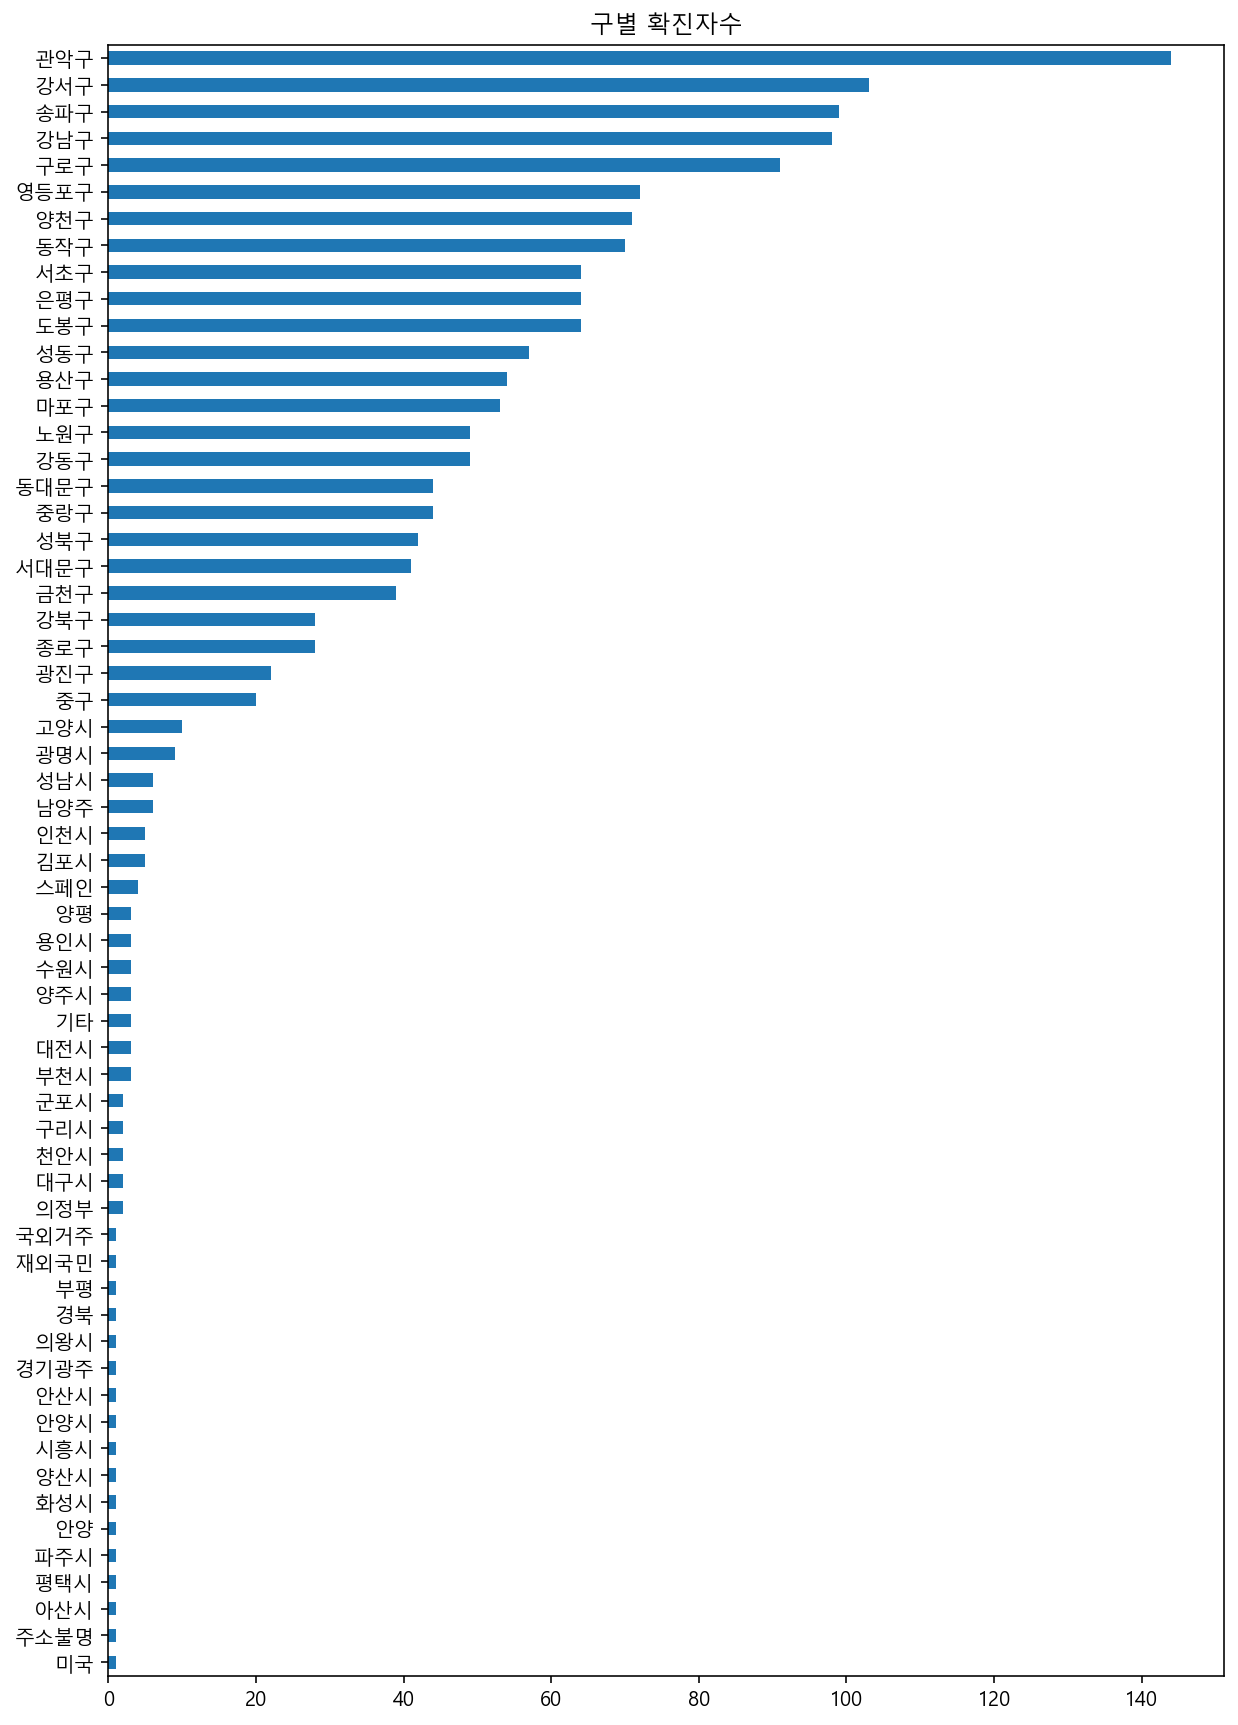

In [446]:
# 구별 확진자의 수를 시각화
gu_count.sort_values().plot.barh(figsize=(10,15))
plt.title("구별 확진자수")
plt.show()

In [447]:
# 서울에서 확진 판정을 받은 데이터이기 때문에 거주지가 서울이 아닐 수 도 있다.
# 거주지 별로 서울시에 해당되는 데이터만 따로 가져온다.

gu = gu_count[:25].index
gu

Index(['관악구', '강서구', '송파구', '강남구', '구로구', '영등포구', '양천구', '동작구', '서초구', '은평구',
       '도봉구', '성동구', '용산구', '마포구', '강동구', '노원구', '동대문구', '중랑구', '성북구', '서대문구',
       '금천구', '강북구', '종로구', '광진구', '중구'],
      dtype='object')

In [448]:
# 거주지가 서울이 아닌 지역을 따로 추출
set(gu_count.index) - set(gu)

{'경기광주',
 '경북',
 '고양시',
 '광명시',
 '구리시',
 '국외거주',
 '군포시',
 '기타',
 '김포시',
 '남양주',
 '대구시',
 '대전시',
 '미국',
 '부천시',
 '부평',
 '성남시',
 '수원시',
 '스페인',
 '시흥시',
 '아산시',
 '안산시',
 '안양',
 '안양시',
 '양산시',
 '양주시',
 '양평',
 '용인시',
 '의왕시',
 '의정부',
 '인천시',
 '재외국민',
 '주소불명',
 '천안시',
 '파주시',
 '평택시',
 '화성시'}

In [449]:
# 구를 전처리 하기 쉽게 컬럼으로 변환하기 위해 reset_index로 변환
df_gu = gu_count.reset_index()
df_gu.columns= ["구", "확진수"]
df_gu.head()

,구,확진수
0,관악구,144
1,강서구,103
2,송파구,99
3,강남구,98
4,구로구,91


In [450]:
# 서울에서 확진 받은 사람 중 서울 vs 타지역을 비교해 보기 위해
# '지역'이라는 새로운 컬럼을 만들어 서울지역이 아니라면 "타지역"이라는 값을 넣어준다.

df.loc[df["거주지"].isin(gu), "지역"] = df["거주지"]
#df.loc[~df["거주지"].isin(gu), "지역"]
# df.loc[df["지역"].isnull(), "지역"] = "타지역"
df["지역"] = df["지역"].fillna("타지역")
df["지역"].unique()

array(['마포구', '서초구', '은평구', '송파구', '강동구', '강남구', '관악구', '강서구', '구로구',
       '성북구', '강북구', '영등포구', '중구', '타지역', '종로구', '용산구', '양천구', '동대문구',
       '동작구', '금천구', '성동구', '도봉구', '광진구', '서대문구', '노원구', '중랑구'],
      dtype=object)

In [451]:
# "지역" 컬럼으로 확진자 빈도수를 구합니다. 

gu_etc_count  = df["지역"].value_counts()
gu_etc_count


관악구    144
강서구    103
송파구     99
강남구     98
타지역     93
      ... 
금천구     39
강북구     28
종로구     28
광진구     22
중구      20
Name: 지역, Length: 26, dtype: int64

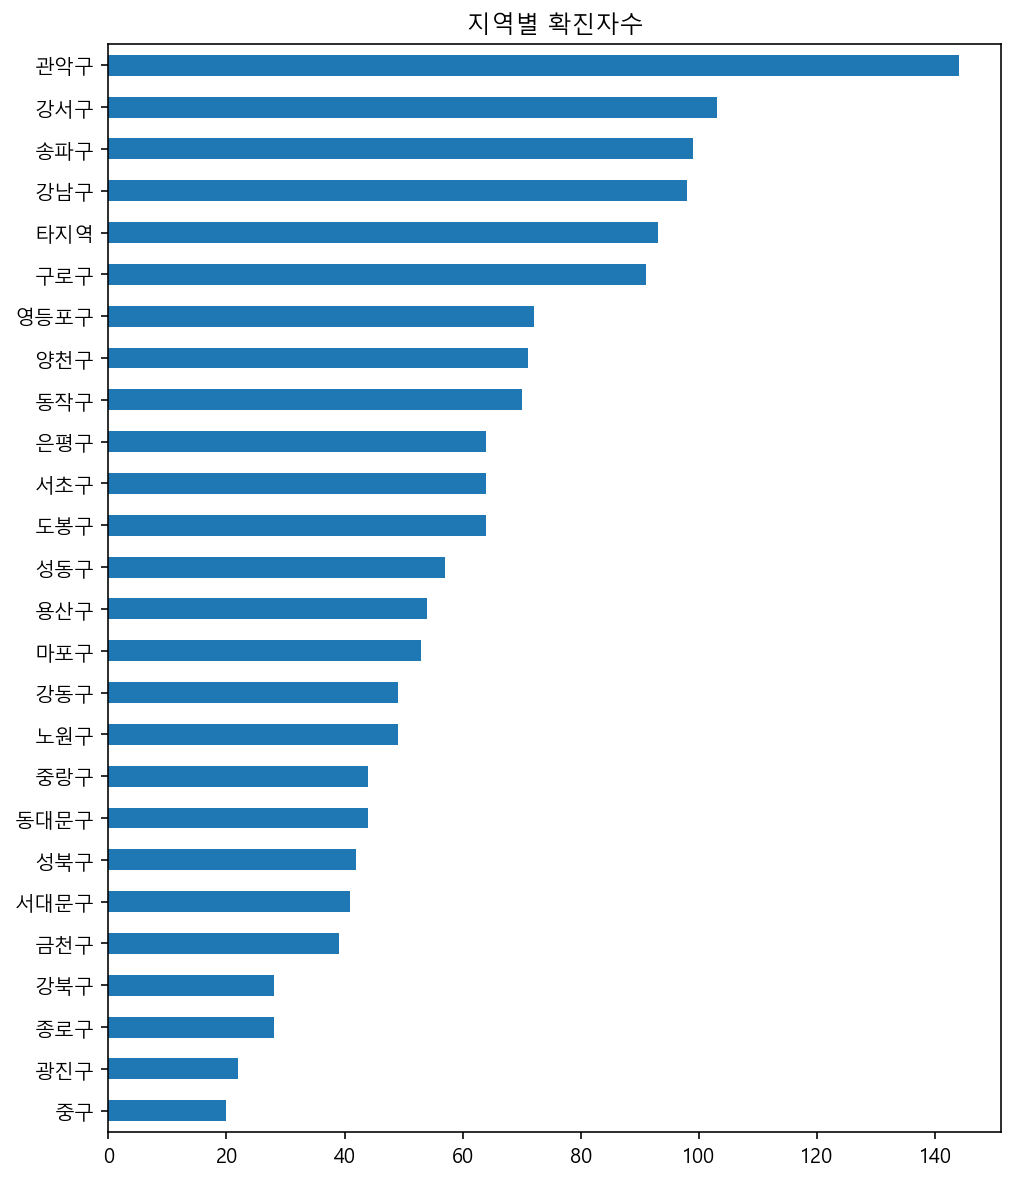

In [452]:
# 위에서 구한 빈도수를 막대그래프로 그립니다. 
gu_etc_count.sort_values().plot.barh(figsize=(8,10))
plt.title("지역별 확진자수")
plt.show()

관악구, 강서구, 송파구 순으로 확진자수 가 많음

## 인구수 대비 확진자 비율
* 통계청의 서울시 인구 데이터를 활용해 구별 인구수 대비 확진자 비율을 살펴본다.
* "http://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1B040A3&checkFlag=N"

In [453]:
# 다운받은 통계청 데이터 로드
df_po = pd.read_csv("data/행정구역_시군구_별__성별_인구수_20200813155150.csv", encoding = "cp949")
df_po.head()

,행정구역(시군구)별,2020. 05,2020. 05.1,2020. 05.2,2020. 06,2020. 06.1,2020. 06.2,2020. 07,2020. 07.1,2020. 07.2
0,행정구역(시군구)별,총인구수 (명),남자인구수 (명),여자인구수 (명),총인구수 (명),남자인구수 (명),여자인구수 (명),총인구수 (명),남자인구수 (명),여자인구수 (명)
1,서울특별시,9724496,4735431,4989065,9720846,4732275,4988571,9715429,4728872,4986557
2,종로구,150623,73407,77216,150383,73288,77095,150183,73214,76969
3,중구,126120,61747,64373,126092,61697,64395,125970,61644,64326
4,용산구,229393,110537,118856,229431,110527,118904,229432,110438,118994


In [454]:
# 필요한 데이터만 가져오기
df_po = df_po.iloc[2:, [0, 7]]

In [455]:
# 컬럼명 바꿔주기
df_po.columns = ["구", "인구수"]
df_po.head()

,구,인구수
2,종로구,150183
3,중구,125970
4,용산구,229432
5,성동구,296896
6,광진구,349258


In [456]:
# merge로 합쳐주기 
df_gu_po = df_gu.merge(df_po, left_on= "구", right_on = "구", how = "left")
df_gu_po

,구,확진수,인구수
0,관악구,144,499729
1,강서구,103,586279
2,송파구,99,671589
3,강남구,98,540636
4,구로구,91,405260
...,...,...,...
56,국외거주,1,NaN
57,의왕시,1,NaN
58,경기광주,1,NaN
59,경북,1,NaN


In [457]:
# 서울시 외의 데이터 버리기
df_gu_po = df_gu_po.dropna()
df_gu_po.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 0 to 24
Data columns (total 3 columns):
구      25 non-null object
확진수    25 non-null int64
인구수    25 non-null object
dtypes: int64(1), object(2)
memory usage: 800.0+ bytes


In [458]:
# 인구수 타입 변경
df_gu_po["인구수"] = df_gu_po["인구수"].astype(int)

In [459]:
# 비율 구하기
df_gu_po["비율(%)"] = (df_gu_po["확진수"] / df_gu_po["인구수"]) * 100
df_gu_po.sort_values(by="비율(%)", ascending=False)

,구,확진수,인구수,비율(%)
0,관악구,144,499729,0.028816
12,용산구,54,229432,0.023536
4,구로구,91,405260,0.022455
10,도봉구,64,328822,0.019463
5,영등포구,72,374097,0.019246
...,...,...,...,...
14,강동구,49,457339,0.010714
18,성북구,42,441188,0.009520
15,노원구,49,527981,0.009281
21,강북구,28,311198,0.008997


인구대비 환진자 수 비율로 봤을때 관악구 0.028%, 용산구 0.023%, 구로구 0.022% 순

# 접촉력

## 중복되는 값 전처리

In [460]:
# 접촉력 빈도수를 구합니다.
df["접촉력"].value_counts()

해외 접촉 추정      320
확인 중          143
이태원 클럽 관련     139
리치웨이 관련       119
구로구 콜센터 관련     60
             ... 
#8044 접촉        1
#8646 접촉        1
#7914 접촉        1
#10407 접촉       1
#9621 접촉        1
Name: 접촉력, Length: 149, dtype: int64

"확인", "확인 중" 중복되는 값 합치기

In [461]:
df.loc[df["접촉력"].str.contains("확인"),"접촉력"] ="확인 중"

In [462]:
df.loc[df["접촉력"].str.contains("확인"),"접촉력"].unique()

array(['확인 중'], dtype=object)

## 접촉력 빈도수 시각화

In [463]:
# 접촉력 빈도수를 시각화 합니다. 

contact_count = df["접촉력"].value_counts()
contact_count
df["접촉력"].value_counts(normalize=True)

해외 접촉 추정        0.199626
확인 중            0.115409
이태원 클럽 관련       0.086712
리치웨이 관련         0.074236
구로구 콜센터 관련      0.037430
                  ...   
#10054 접촉       0.000624
#6937 접촉자       0.000624
#10142 접촉       0.000624
#6959 접촉(추정)    0.000624
#9621 접촉        0.000624
Name: 접촉력, Length: 148, dtype: float64

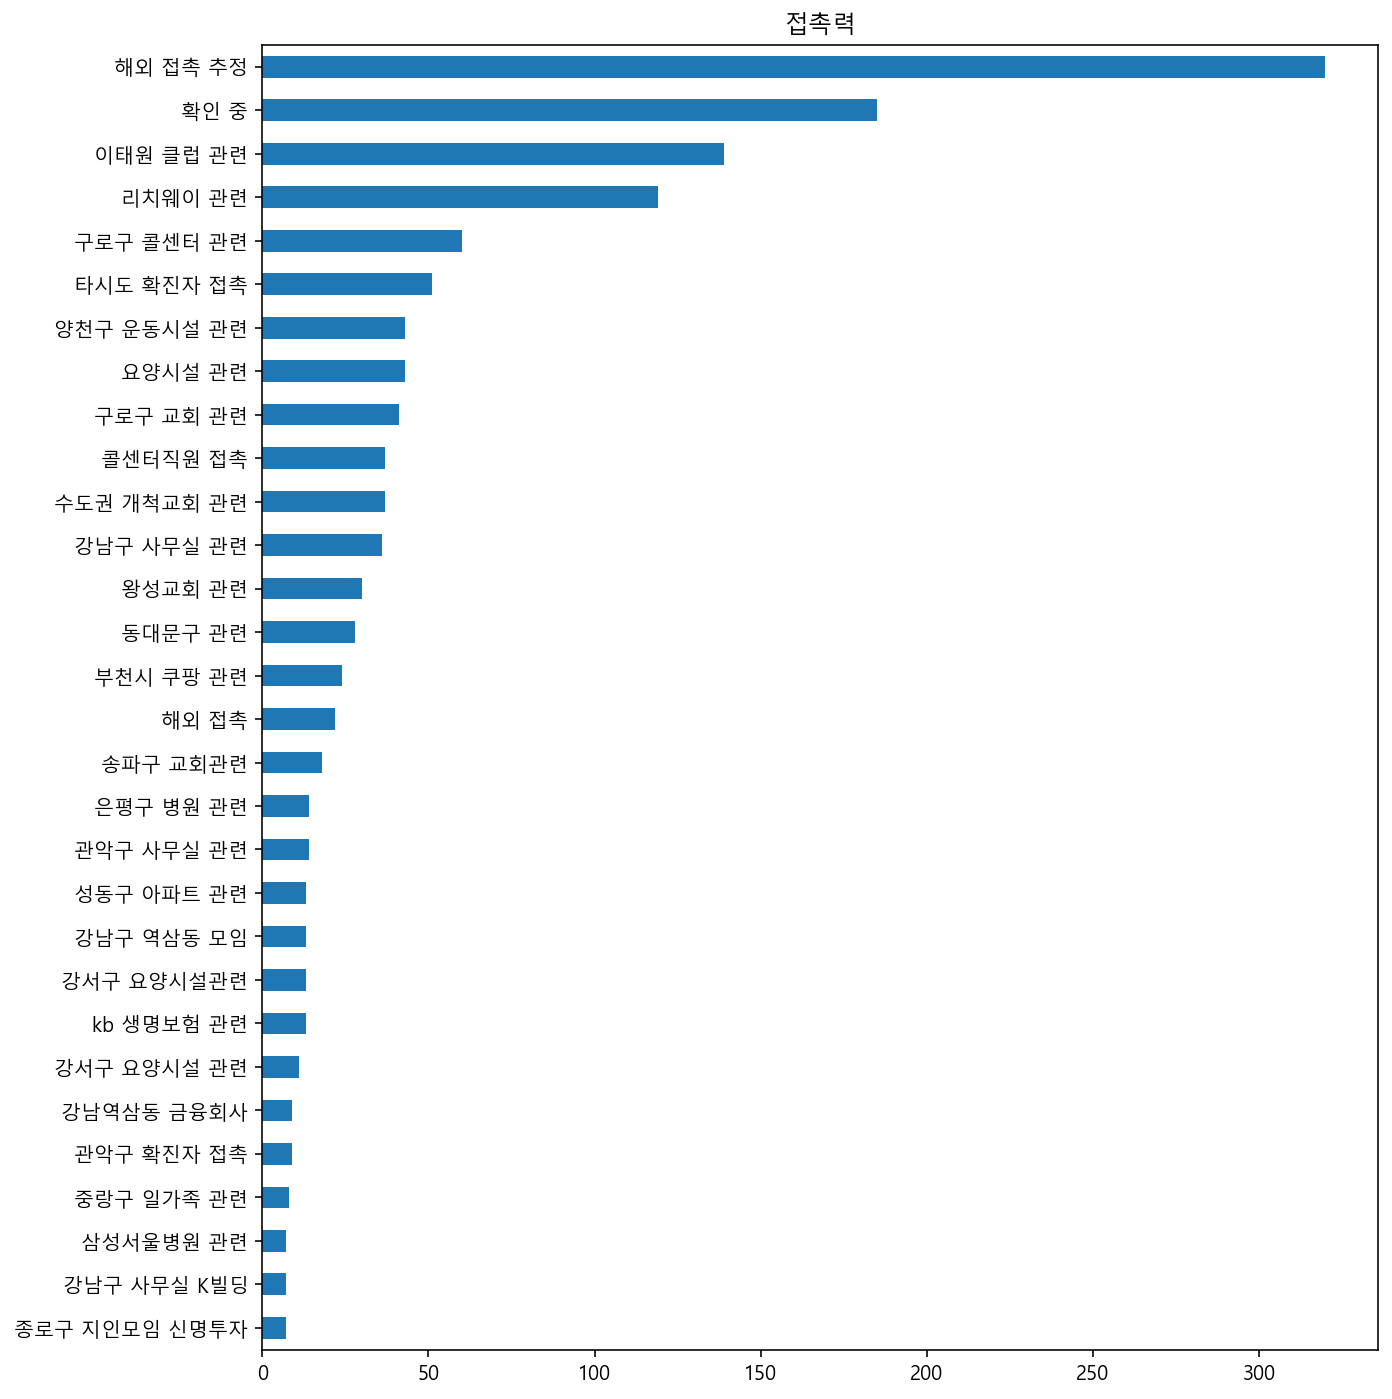

In [464]:
# 상위 30번째까지 시각화

contact_count_top = contact_count.sort_values().tail(30)

contact_count_top.plot.barh(figsize=(10,12))
plt.title("접촉력")
plt.show()


해외 접촉에 의한 감염이 가장 많음(전체확진자의 20% 정도)

### 연관있는 접촉력 묶어서 보기

In [465]:
df["접촉력"].value_counts()

해외 접촉 추정        320
확인 중            185
이태원 클럽 관련       139
리치웨이 관련         119
구로구 콜센터 관련       60
               ... 
#10054 접촉         1
#6937 접촉자         1
#10142 접촉         1
#6959 접촉(추정)      1
#9621 접촉          1
Name: 접촉력, Length: 148, dtype: int64

교회관련, 콜센터 관련, 확진자 접촉관련 등 공통적인 항목으로 묶어볼 수 있을것 같다.

In [466]:
# 콜센터 관련 
print(df[df["접촉력"].str.contains("콜")]["접촉력"].unique())
df[df["접촉력"].str.contains("콜")]["접촉력"].count()

['콜센터직원 접촉' '구로구 콜센터 관련' '구로구 콜센터 접촉']


98

In [467]:
# 교회 관련 
print(df[df["접촉력"].str.contains("교회")]["접촉력"].unique())
df[df["접촉력"].str.contains("교회")]["접촉력"].count()

['송파구 교회관련' '왕성교회 관련' '대전 꿈꾸는 교회' '수도권 개척교회 관련' '한국대학생선교회 관련'
 '강남구 동인교회 관련' '구로구 교회 관련' '명성교회 관련' '신천지대구교회 관련' '대구 방문(명성교회)']


145

In [468]:
# 요양시설 관련 
print(df[df["접촉력"].str.contains("요양")]["접촉력"].unique())
df[df["접촉력"].str.contains("요양")]["접촉력"].count()

['강서구 요양시설관련' '강서구 요양시설 관련' '요양시설 관련']


67

In [469]:
# 병원관련
print(df[df["접촉력"].str.contains("병원")]["접촉력"].unique())
df[df["접촉력"].str.contains("병원")]["접촉력"].count()

['삼성서울병원 관련' '은평구 병원 관련' '경찰병원관련' '서울재생병원 관련']


23

In [470]:
# 확진자 접촉에 의한 소규모 감염
print(df[df["접촉력"].str.contains("확진자") | df["접촉력"].str.contains("#")]["접촉력"].unique())
df[df["접촉력"].str.contains("확진자") | df["접촉력"].str.contains("#")]["접촉력"].count()

['송파구 확진자 접촉' '타시도 확진자 접촉' '관악구 확진자 접촉' '중구 확진자 접촉' '강북구 확진자 접촉'
 '은평구 확진자 접촉' '동작구 확진자 접촉' '강남구 확진자 접촉' '서초구 확진자 접촉' '성동구 확진자 접촉'
 '영등포구 확진자 접촉' '양천구 확진자 접촉' '강서구 확진자 접촉' '용산구 확진자 접촉' '광진구 확진자 접촉'
 '종로구 확진자 접촉' '구로구 확진자 접촉' '금천구 확진자 접촉' '강동구 확진자 접촉' '타시도 확진자 접촉자'
 '#11196 접촉' '#10054 접촉' '#9800 접촉' '#10044 접촉' '#9641 접촉' '#10407 접촉'
 '#10015 접촉' '#9364 접촉' '#10377 접촉' '#9287 접촉' '#10142 접촉' '#9912 접촉'
 '#9765 접촉' '#10115 접촉' '타시도 확진자 접촉(추정)' '#8063 접촉' '#10084 접촉' '#8601 접촉'
 '#8717 접촉' '#9946 접촉' '#8271 접촉' '#8669 접촉' '#9734 접촉' '#9621 접촉'
 '#9572 접촉' '#9525 접촉' '#7914 접촉' '#8791 접촉' '#9219 접촉' '#8057 접촉'
 '#8079 접촉' '#8646 접촉' '#9020 접촉' '#8245 접촉' '#8709 접촉 추정' '#8881 접촉 추정'
 '#8486 접촉' '#8196 접촉' '#8138 접촉' '#8044 접촉' '#7923 접촉' '#7573 접축 추정'
 '#6959 접촉(추정)' '#7280 접촉(추정)' '#7500 접촉(추정)' '#6727 첩촉' '#6832 접촉자'
 '#6921접촉자' '#935 접촉자' '#6937 접촉자' '대구 확진자 접촉' '#794 접촉(추정)' '#2621번 접촉'
 '#1247 접촉(추정)' '#794 접촉자' '#780 접촉(추정)' '#56 접촉' '#136 접촉' '#6 접촉(추정)'
 '#30 접촉' '#29 접촉' '#83 접촉' 

193

In [471]:
df["접촉구분"] = df["접촉력"]
df.loc[df["접촉구분"].str.contains("콜"), "접촉구분"] = "콜센터 관련"
df.loc[df["접촉구분"].str.contains("교회"), "접촉구분"] = "교회 관련"
df.loc[df["접촉구분"].str.contains("요양"), "접촉구분"] = "요양시설 관련"
df.loc[df["접촉구분"].str.contains("병원"), "접촉구분"] = "병원 관련"
df.loc[df["접촉구분"].str.contains("확진자") | df["접촉구분"].str.contains("#"), "접촉구분"] = "확진자 접촉에 의한 소규모 감염"

In [472]:
df["접촉구분"].unique()

array(['확인 중', '확진자 접촉에 의한 소규모 감염', '강남구 사무실 K빌딩', '송파구 지인모임', '요양시설 관련',
       '해외 접촉 추정', '종로구 지인모임 신명투자', '관악구 사무실 관련', '교회 관련', '강남구 사무실 관련',
       '강남역삼동 금융회사', '강남구 이동통신 종사자', '강남구 역삼동 모임', '중랑구 일가족 관련',
       '관악구 일가족 관련', '리치웨이 관련', '시청역 관련', '대자연코리아', '의왕 물류센터 관련',
       '금천구 도정기 회사 관련', '양천구 운동시설 관련', '대전 다단계 관련', '오렌지라이프 관련',
       '연아나뉴스클래스 관련', '해외접촉 추정', 'kb 생명보험 관련', '부천시 쿠팡 관련', '이태원 클럽 관련',
       '용인 형제 관련', '삼성화재 관련', '서초구 가족 관련', '안양군포 목회자 관련', '서초구 가족관련',
       '영등포 학원 관련', '원어성경연구회 관련', '병원 관련', '콜센터 관련', '동대문구 관련', '해외 접촉',
       '신천지 추정', '대구 거주', '성동구 아파트 관련', '대구 방문', '부동산 중개 법인 관련',
       '여의도 건설현장 관련', '부동산 중개업 관련', '쇼핑몰 관련', '대구 거주자'], dtype=object)

In [473]:
df["접촉구분"].value_counts().head(30)

해외 접촉 추정             320
확진자 접촉에 의한 소규모 감염    193
확인 중                 185
교회 관련                145
이태원 클럽 관련            139
                    ... 
대구 방문                  5
강남구 이동통신 종사자           5
송파구 지인모임               5
연아나뉴스클래스 관련            5
용인 형제 관련               4
Name: 접촉구분, Length: 30, dtype: int64

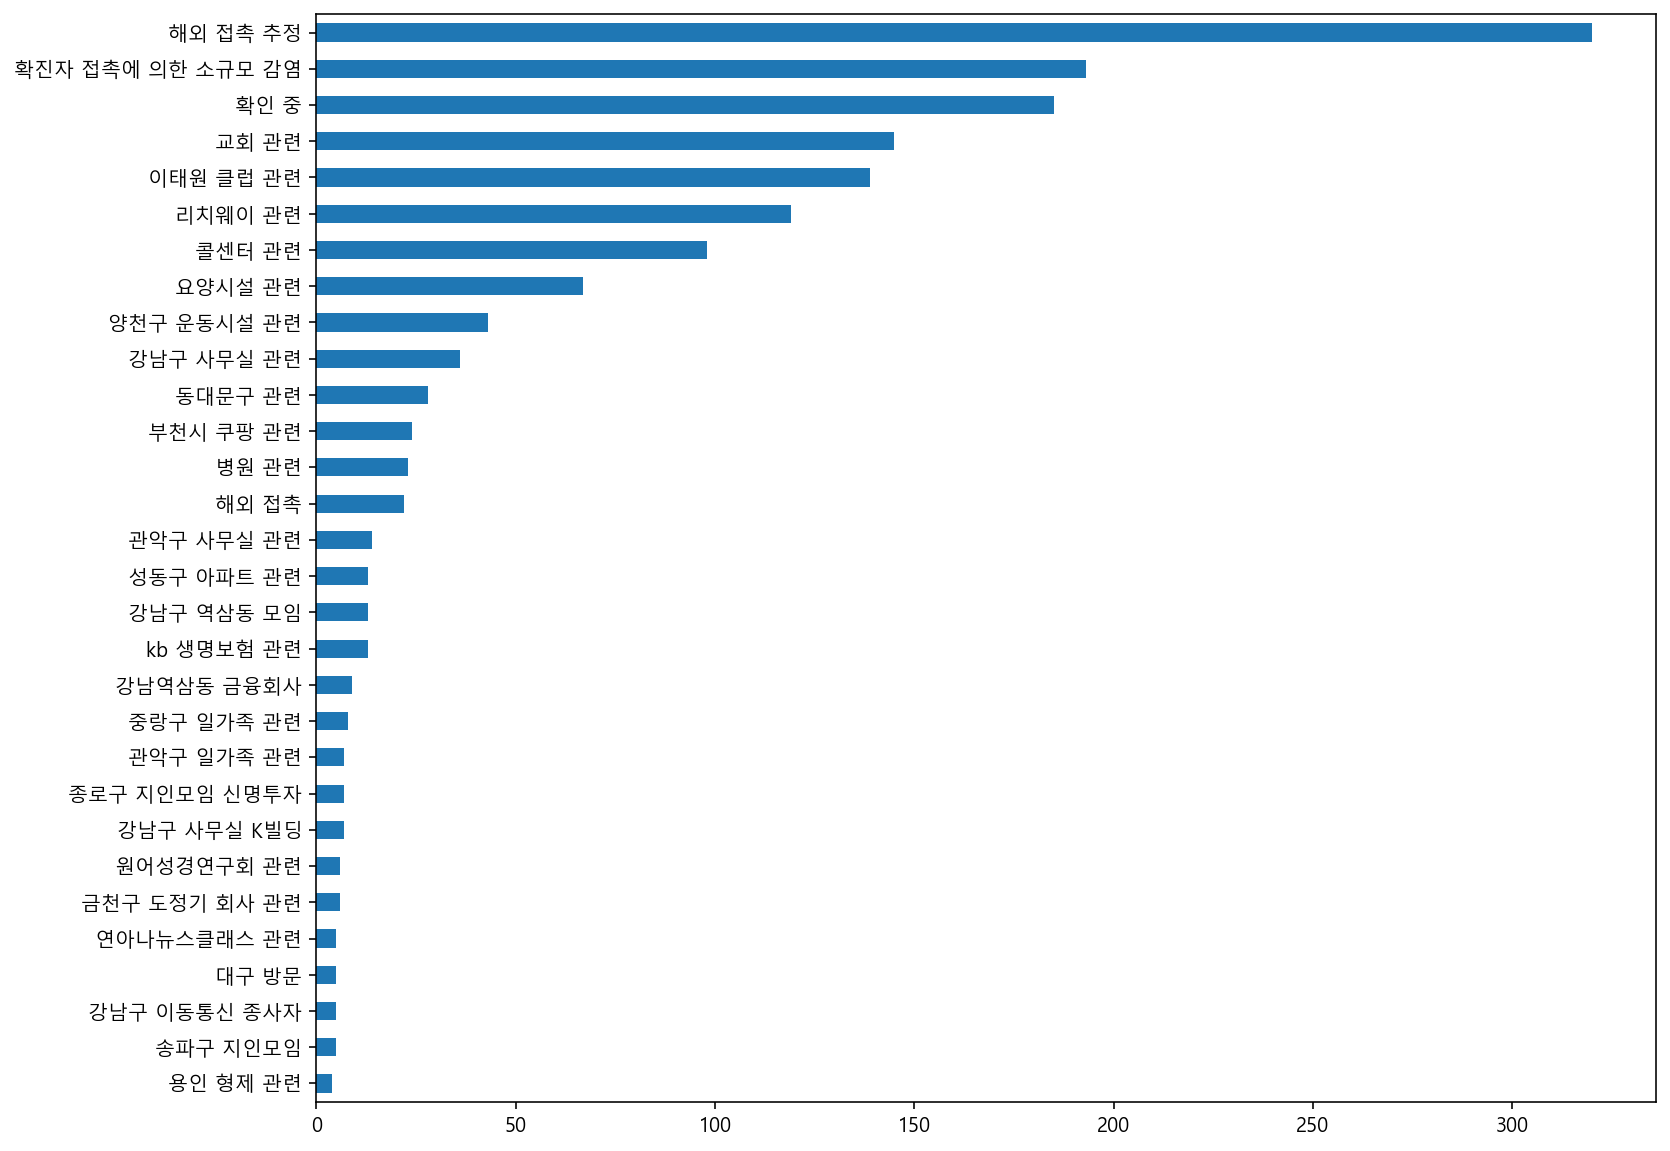

In [474]:
df["접촉구분"].value_counts().head(30).sort_values().plot.barh(figsize=(12,10))

해외 접촉이 가장 많고, 확진자 접촉에 의한 소규모 감염, 미확인, 교회관련 순

### 월별로 보기

In [475]:
# 상위 15개만 구합니다.
df["접촉구분"].value_counts().head(15)
top_contact = df["접촉구분"].value_counts().head(15)
top_contact.index

Index(['해외 접촉 추정', '확진자 접촉에 의한 소규모 감염', '확인 중', '교회 관련', '이태원 클럽 관련',
       '리치웨이 관련', '콜센터 관련', '요양시설 관련', '양천구 운동시설 관련', '강남구 사무실 관련', '동대문구 관련',
       '부천시 쿠팡 관련', '병원 관련', '해외 접촉', '관악구 사무실 관련'],
      dtype='object')

In [476]:
# 위에서 구한 top_contact 에 해당되는 데이터만 isin울 가져옵니다.
top_group = df[df["접촉구분"].isin(top_contact.index)]
top_group.sort_values(by="월", ascending=True)

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주,확진요일,지역,접촉구분
1602,1,2,1.24.,강서구,중국 우한시,해외 접촉,국립중앙의료원(퇴원),2020-01-24,1,4,4,강서구,해외 접촉
1596,7,11,1.31.,종로구,-,#6 접촉,서울대학교병원(퇴원),2020-01-31,1,5,4,종로구,확진자 접촉에 의한 소규모 감염
1597,6,10,1.31.,종로구,-,#6 접촉,서울대학교병원(퇴원),2020-01-31,1,5,4,종로구,확진자 접촉에 의한 소규모 감염
1601,2,5,1.30.,중랑구,중국 우한시,해외 접촉,서울의료원(퇴원),2020-01-30,1,5,3,중랑구,해외 접촉
1599,4,7,1.30.,마포구,중국 우한시,해외 접촉,서울의료원(퇴원),2020-01-30,1,5,3,마포구,해외 접촉
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,1430,13493,7.13.,강남구,-,관악구 사무실 관련,서울의료원(퇴원),2020-07-13,7,29,0,강남구,관악구 사무실 관련
171,1432,13499,7.13.,동작구,-,관악구 사무실 관련,보라매병원(퇴원),2020-07-13,7,29,0,동작구,관악구 사무실 관련
170,1433,13503,7.13.,종로구,-,강남구 사무실 관련,서울백병원(퇴원),2020-07-13,7,29,0,종로구,강남구 사무실 관련
186,1417,13439,7.12.,관악구,-,강남구 사무실 관련,보라매병원(퇴원),2020-07-12,7,28,6,관악구,강남구 사무실 관련


In [477]:
# 접촉력, 월별 빈도수를 groupby 로 구합니다.
df_group = top_group.groupby(["접촉구분", "월"])["연번"].count().unstack().fillna(0).astype(int)
df_group

월,1,2,3,4,5,6,7
접촉구분,,,,,,,
강남구 사무실 관련,0,0,0,0,0,2,34
관악구 사무실 관련,0,0,0,0,0,0,14
교회 관련,0,4,35,6,10,67,23
동대문구 관련,0,0,28,0,0,0,0
리치웨이 관련,0,0,0,0,0,119,0
...,...,...,...,...,...,...,...
콜센터 관련,0,0,97,1,0,0,0
해외 접촉,3,10,9,0,0,0,0
해외 접촉 추정,0,1,121,112,24,23,39


In [478]:
df_group[1] = 0
df_group = df_group.sort_index(axis=1)
df_group.style.background_gradient()

월,1,2,3,4,5,6,7
접촉구분,,,,,,,
강남구 사무실 관련,0,0,0,0,0,2,34
관악구 사무실 관련,0,0,0,0,0,0,14
교회 관련,0,4,35,6,10,67,23
동대문구 관련,0,0,28,0,0,0,0
리치웨이 관련,0,0,0,0,0,119,0
병원 관련,0,16,0,0,7,0,0
부천시 쿠팡 관련,0,0,0,0,19,5,0
양천구 운동시설 관련,0,0,0,0,0,43,0
요양시설 관련,0,0,0,0,0,43,24


* 3월 구로구콜센터, 해외접촉
* 4월 해외접촉 
* 5월 이태원 클럽
* 6월 리치웨이
* 7월 강남구 사무실 관련 
이슈 발생

## 감염경로 불명

In [479]:
# "접촉력"이 "확인 중"인 데이터만 구합니다.
df_unknown = df[df["접촉력"] == "확인 중"]
df_unknown.head()

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주,확진요일,지역,접촉구분
0,1605,14360,7.31.,마포구,-,확인 중,서울대학교병원,2020-07-31,7,31,4,마포구,확인 중
1,1602,14332,7.31.,서초구,-,확인 중,서울성모병원,2020-07-31,7,31,4,서초구,확인 중
2,1601,14325,7.30.,은평구,-,확인 중,서울의료원,2020-07-30,7,31,3,은평구,확인 중
11,1592,14264,7.29.,구로구,-,확인 중,은평성모병원,2020-07-29,7,31,2,구로구,확인 중
18,1585,14230,7.28.,송파구,-,확인 중,삼성서울병원,2020-07-28,7,31,1,송파구,확인 중


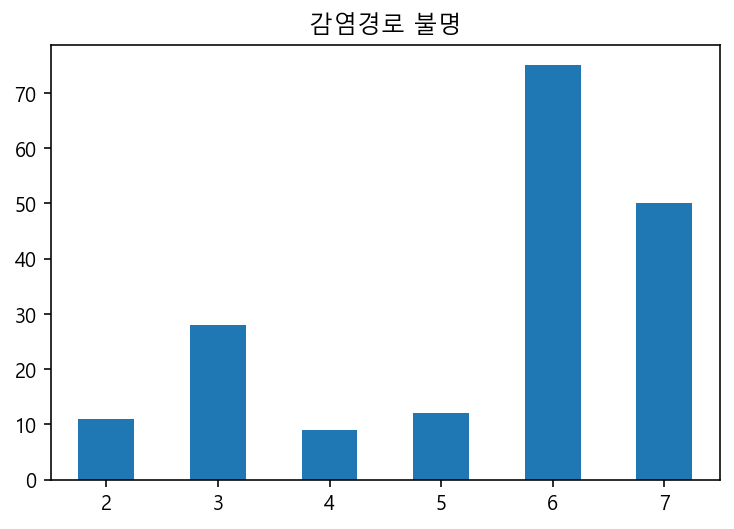

In [480]:
# 감염결로 불명이 어느정도인지 봅니다.
unknown_monthly_case = df_unknown["월"].value_counts()
unknown_monthly_case.sort_index().plot.bar(rot=0)
plt.title("감염경로 불명")
plt.show()

In [481]:
unknown_monthly_case

6    75
7    50
3    28
5    12
2    11
4     9
Name: 월, dtype: int64

### 월별 경로 불명 환자수의 비율

In [482]:
df_monthly_count = df["월"].value_counts().to_frame("확진자수")
df_monthly_count

,확진자수
6,460
3,391
7,281
5,228
4,156
2,80
1,7


In [483]:
df_unknown_monthly = unknown_monthly_case.to_frame("불명확진자수")
df_unknown_monthly

,불명확진자수
6,75
7,50
3,28
5,12
2,11
4,9


In [484]:
# merge로 합쳐주기
df_unkown = df_monthly_count.merge(df_unknown_monthly, left_index=True, right_index=True
                      ,how="left")

df_unkown

,확진자수,불명확진자수
6,460,75.0
3,391,28.0
7,281,50.0
5,228,12.0
4,156,9.0
2,80,11.0
1,7,NaN


In [485]:
df_unkown["비율"] = df_unkown["불명확진자수"] / df_unkown["확진자수"] * 100
df_unkown.sort_values(by = "비율",ascending = False)

,확진자수,불명확진자수,비율
7,281,50.0,17.793594
6,460,75.0,16.304348
2,80,11.0,13.750000
3,391,28.0,7.161125
4,156,9.0,5.769231
5,228,12.0,5.263158
1,7,NaN,NaN


7월, 6월, 2월 순. 

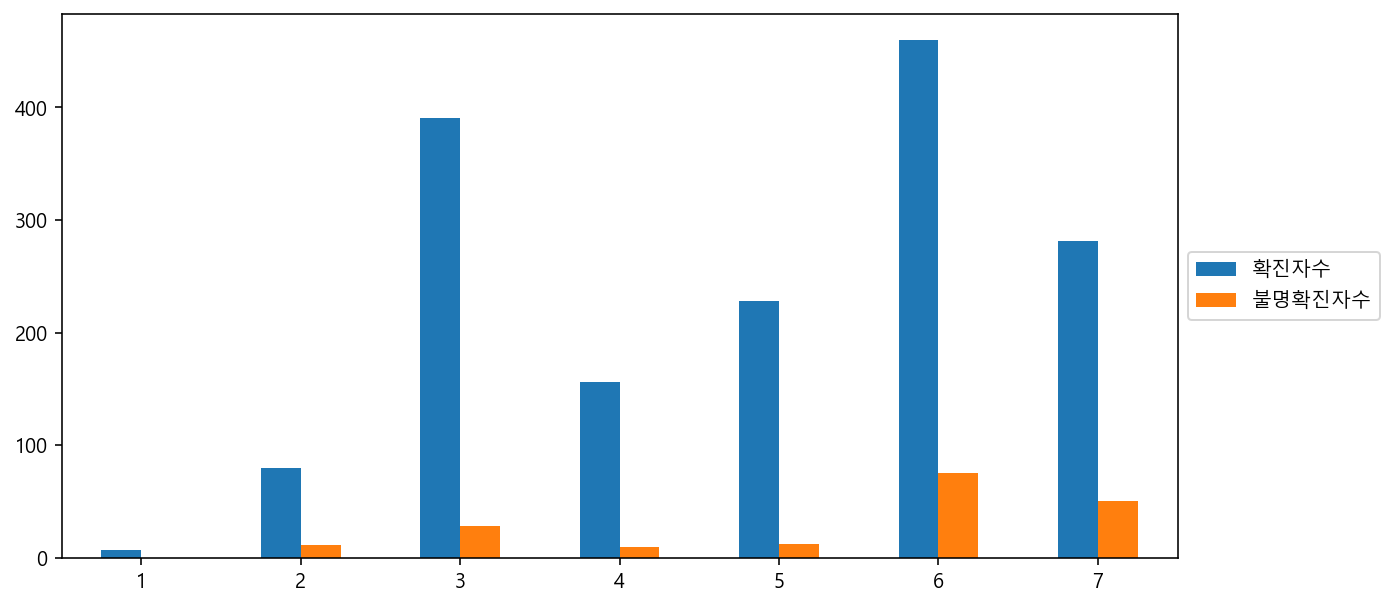

In [486]:
# 월별 확진자, 감염경로 불명 수 시각화
g = df_unkown[["확진자수", "불명확진자수"]].sort_index().plot.bar(rot=0, figsize=(10,5))
g.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.show()

# 조치사항

In [487]:
# 조치사항에 대한 빈도수를 세어본다

df["조치사항"].value_counts().head()

서울의료원(퇴원)     438
보라매병원(퇴원)     284
서남병원(퇴원)      261
생활치료센터(퇴원)    100
서북병원(퇴원)       76
Name: 조치사항, dtype: int64

## 퇴원, 사망여부

In [488]:
# 조치사항 컬럼을 통해 퇴원과 사망 컬럼을 새로 만듭니다.
# 또, 어느 병원에 조치되었는지도 병원 컬럼을 만든다. 

df["퇴원"] = df["조치사항"].str.contains("퇴원")
df["사망"] = df["조치사항"].str.contains("사망")
df["병원"] = df["조치사항"].str.replace("\(퇴원\)", "").str.replace("\(사망\)", "")

df

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주,확진요일,지역,접촉구분,퇴원,사망,병원
0,1605,14360,7.31.,마포구,-,확인 중,서울대학교병원,2020-07-31,7,31,4,마포구,확인 중,False,False,서울대학교병원
1,1602,14332,7.31.,서초구,-,확인 중,서울성모병원,2020-07-31,7,31,4,서초구,확인 중,False,False,서울성모병원
2,1601,14325,7.30.,은평구,-,확인 중,서울의료원,2020-07-30,7,31,3,은평구,확인 중,False,False,서울의료원
3,1600,14303,7.30.,송파구,-,송파구 확진자 접촉,보라매병원,2020-07-30,7,31,3,송파구,확진자 접촉에 의한 소규모 감염,False,False,보라매병원
4,1599,14300,7.30.,강동구,-,강남구 사무실 K빌딩,서울의료원,2020-07-30,7,31,3,강동구,강남구 사무실 K빌딩,False,False,서울의료원
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1598,5,9,1.31.,성북구,-,#5 접촉,서울의료원(퇴원),2020-01-31,1,5,4,성북구,확진자 접촉에 의한 소규모 감염,True,False,서울의료원
1599,4,7,1.30.,마포구,중국 우한시,해외 접촉,서울의료원(퇴원),2020-01-30,1,5,3,마포구,해외 접촉,True,False,서울의료원
1600,3,6,1.30.,종로구,-,#3 접촉,서울대학교병원(퇴원),2020-01-30,1,5,3,종로구,확진자 접촉에 의한 소규모 감염,True,False,서울대학교병원
1601,2,5,1.30.,중랑구,중국 우한시,해외 접촉,서울의료원(퇴원),2020-01-30,1,5,3,중랑구,해외 접촉,True,False,서울의료원


In [489]:
# 데이터 수집 시점에서 퇴원하지 못한 환자수 
df["퇴원"].value_counts()

True     1488
False     115
Name: 퇴원, dtype: int64

In [490]:
# 사망여부에 따른 빈도수를 구한다

df["사망"].value_counts()

False    1591
True       12
Name: 사망, dtype: int64

In [491]:
# 사망여부에 따른 비율

df["사망"].value_counts(normalize=True)

False    0.992514
True     0.007486
Name: 사망, dtype: float64

치명율은 0.75% 정도

## 지역에 따른 사망자

In [492]:
df[df["사망"] == True]["지역"].value_counts()

타지역     3
도봉구     3
마포구     2
서대문구    1
강서구     1
동대문구    1
종로구     1
Name: 지역, dtype: int64

타지역이 3명, 도봉구 3, 마포구 2명 순

## 병원

In [493]:
df["병원"].describe()

count      1603
unique       48
top       서울의료원
freq        464
Name: 병원, dtype: object

In [494]:
# 병원의 빈도수를 구한다
hospital_count = df["병원"].value_counts()
hospital_count.head(10)

서울의료원      464
보라매병원      303
서남병원       279
생활치료센터     101
서북병원        83
국립중앙의료원     68
타시도 이관      56
은평성모병원      22
서울대학교병원     18
상계백병원       18
Name: 병원, dtype: int64

서울시 의료원에 입원한 환자가 가장 많다

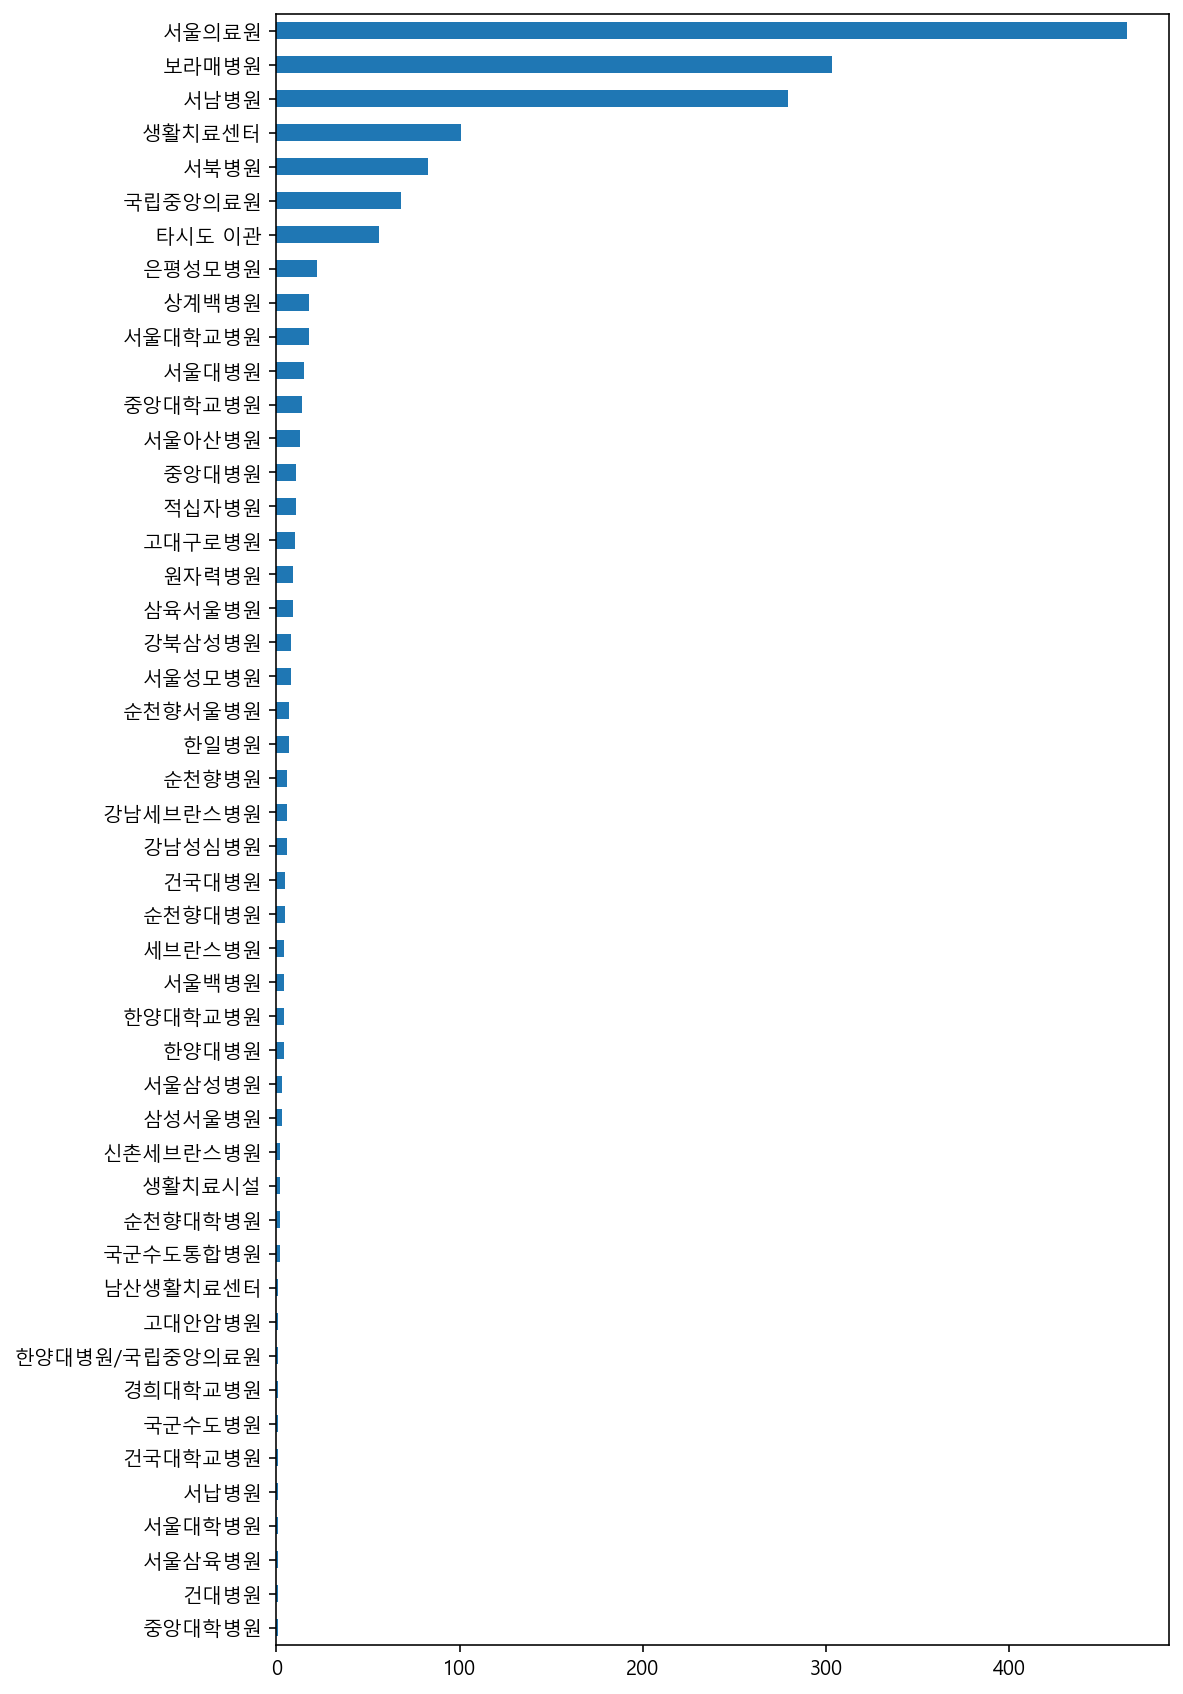

In [495]:
# 병원별 빈도수 막대그래프로 표현

hospital_count.sort_values().plot.barh(figsize=(8,15))

### 지역별 입원 병원 

In [496]:
# 입원 환자가 많은 병월을 구합니다.
top_hospital_count = hospital_count.head(10)
top_hospital_count = top_hospital_count.index
top_hospital_count

Index(['서울의료원', '보라매병원', '서남병원', '생활치료센터', '서북병원', '국립중앙의료원', '타시도 이관',
       '은평성모병원', '서울대학교병원', '상계백병원'],
      dtype='object')

In [497]:
hospital_gu = df.groupby(["지역", "병원"])["연번"].count().unstack()
hospital_gu.head()

병원,강남성심병원,강남세브란스병원,강북삼성병원,건국대병원,건국대학교병원,건대병원,경희대학교병원,고대구로병원,고대안암병원,국군수도병원,국군수도통합병원,국립중앙의료원,남산생활치료센터,보라매병원,삼성서울병원,삼육서울병원,상계백병원,생활치료센터,생활치료시설,서남병원,서납병원,서북병원,서울대병원,서울대학교병원,서울대학병원,서울백병원,서울삼성병원,서울삼육병원,서울성모병원,서울아산병원,서울의료원,세브란스병원,순천향대병원,순천향대학병원,순천향병원,순천향서울병원,신촌세브란스병원,원자력병원,은평성모병원,적십자병원,중앙대병원,중앙대학교병원,중앙대학병원,타시도 이관,한양대병원,한양대병원/국립중앙의료원,한양대학교병원,한일병원
지역,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
강남구,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,4.0,NaN,23.0,1.0,NaN,1.0,6.0,1.0,9.0,NaN,2.0,NaN,NaN,NaN,1.0,1.0,NaN,4.0,2.0,32.0,NaN,1.0,NaN,2.0,NaN,NaN,2.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
강동구,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,4.0,1.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0
강북구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2.0,NaN,NaN,2.0,1.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,14.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
강서구,1.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,19.0,NaN,NaN,1.0,4.0,NaN,33.0,NaN,7.0,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,5.0,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,1.0
관악구,2.0,1.0,2.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,3.0,NaN,59.0,NaN,2.0,NaN,10.0,NaN,26.0,NaN,6.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN


In [498]:
hospital_gu = hospital_gu.fillna(0).astype(int).loc[:, top_hospital_count]

hospital_gu.style.background_gradient()

,서울의료원,보라매병원,서남병원,생활치료센터,서북병원,국립중앙의료원,타시도 이관,은평성모병원,서울대학교병원,상계백병원
지역,,,,,,,,,,
강남구,32,23,9,6,2,4,0,0,0,1
강동구,30,1,4,0,2,4,0,0,0,0
강북구,14,2,5,1,0,1,0,0,0,2
강서구,12,19,33,4,7,5,0,5,2,1
관악구,24,59,26,10,6,3,0,1,0,0
광진구,14,2,1,0,1,1,0,0,1,0
구로구,16,26,24,2,3,12,0,2,0,0
금천구,1,15,17,0,1,1,0,2,0,0
노원구,31,3,1,0,5,2,0,0,0,6


In [499]:
# 구별로 보기
hospital_gu.T.style.background_gradient()

지역,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,타지역
서울의료원,32,30,14,12,24,14,16,1,31,36,15,8,13,11,17,25,23,44,12,16,16,10,5,3,26,10
보라매병원,23,1,2,19,59,2,26,15,3,3,8,31,6,3,16,8,3,10,15,10,7,12,4,5,3,9
서남병원,9,4,5,33,26,1,24,17,1,8,5,18,15,7,8,7,2,9,33,28,2,10,3,1,1,2
생활치료센터,6,0,1,4,10,0,2,0,0,2,3,5,3,2,10,3,5,11,6,5,5,5,0,3,7,3
서북병원,2,2,0,7,6,1,3,1,5,2,4,2,3,7,4,3,0,2,2,3,2,16,0,1,3,2
국립중앙의료원,4,4,1,5,3,1,12,1,2,3,3,1,1,4,2,3,1,3,1,3,2,2,2,0,1,3
타시도 이관,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,56
은평성모병원,0,0,0,5,1,0,2,2,0,1,0,0,2,2,0,0,0,0,0,0,0,5,1,0,0,1
서울대학교병원,0,0,0,2,0,1,0,0,0,0,0,0,4,0,0,0,1,0,1,0,0,0,8,1,0,0
상계백병원,1,0,2,1,0,0,0,0,6,2,1,0,0,0,0,0,0,3,0,0,1,0,0,0,1,0


전체적으로 서울의료원에 입원한 환자가 많다. 강서쪽은 서남 병원 환자가 많다. 관악, 구로, 동작은 보라매병원 입원환자가 많음.

# 여행력

In [500]:
# "해외" 라는 컬럼을 만들어 데이터를 전처리
# "여행력"에 "-" 문자가 들어가 있으면 결측치로 처리

df["해외"] = df["여행력"]
df["해외"] = df["해외"].str.strip()
df["해외"] = df["해외"].replace("-", np.nan)
df["해외"].unique()

array([nan, '러시아', '미국', '멕시코', '키르기스스탄', '모로코, 터키', '필리핀', '이라크', '쿠웨이트',
       '나이지리아', '일본', '미국, 멕시코', '인도네시아', '영국', '우즈베키스탄', '카자흐스탄', '페루',
       '독일', '아랍에미리트', '인도', 'UAE', '방글라데시', '파키스탄', '터키', '아일랜드', '스페인',
       '프랑스', '콩코, 프랑스', '캐나다', '페루, 미국', '프랑스, 스페인, 독일, 이탈리아, 네덜란드',
       '팔라우', '호주, 인도네시아', '이탈리아', '포르투칼', '브라질', '미국, 캐나다, 멕시코', '미국 뉴욕',
       '오스트리아', '미국, 브라질', '태국', '멕시코, 미국', '아르헨티나, 볼리비아, 브라질', '폴란드',
       '말레이시아', '필리핀, 마닐라', '브라질, 아르헨티아, 칠레, 볼리비아', '프랑스, 독일', '미국, 캐나다',
       '스페인, 카타르', '이탈리아, 프랑스', '체코, 헝가리, 오스트리아, 이탈리아, 프랑스',
       '모로코, 프랑스, 오스트리아', '영국, 프랑스', '스페인,체코', '독일,프랑스', '프랑스, 스페인',
       '스페인, 프랑스', '이탈리아, 독일, 홍콩', '중국 청도', '베트남', '우한교민', '중국 우한시',
       '싱가포르', '우한 교민'], dtype=object)

In [501]:
# 빈도수 구하기
df["해외"].value_counts()

미국                          128
영국                           47
필리핀                          19
스페인                          11
프랑스                          10
                           ... 
미국, 캐나다, 멕시코                  1
미국 뉴욕                         1
모로코, 터키                       1
방글라데시                         1
프랑스, 스페인, 독일, 이탈리아, 네덜란드      1
Name: 해외, Length: 64, dtype: int64

In [502]:
# "해외" 컬럼의 값이 결측치가 아닌 데이터만 가져와서
# df_oversea 라는 새로운 데이터프레임에 담습니다.

df_oversea = df[df["해외"].notnull()].copy()
df_oversea.shape

(345, 17)

In [503]:
# 중복되는 지역명이있는지 봅니다.
df_oversea["해외"].unique()

array(['러시아', '미국', '멕시코', '키르기스스탄', '모로코, 터키', '필리핀', '이라크', '쿠웨이트',
       '나이지리아', '일본', '미국, 멕시코', '인도네시아', '영국', '우즈베키스탄', '카자흐스탄', '페루',
       '독일', '아랍에미리트', '인도', 'UAE', '방글라데시', '파키스탄', '터키', '아일랜드', '스페인',
       '프랑스', '콩코, 프랑스', '캐나다', '페루, 미국', '프랑스, 스페인, 독일, 이탈리아, 네덜란드',
       '팔라우', '호주, 인도네시아', '이탈리아', '포르투칼', '브라질', '미국, 캐나다, 멕시코', '미국 뉴욕',
       '오스트리아', '미국, 브라질', '태국', '멕시코, 미국', '아르헨티나, 볼리비아, 브라질', '폴란드',
       '말레이시아', '필리핀, 마닐라', '브라질, 아르헨티아, 칠레, 볼리비아', '프랑스, 독일', '미국, 캐나다',
       '스페인, 카타르', '이탈리아, 프랑스', '체코, 헝가리, 오스트리아, 이탈리아, 프랑스',
       '모로코, 프랑스, 오스트리아', '영국, 프랑스', '스페인,체코', '독일,프랑스', '프랑스, 스페인',
       '스페인, 프랑스', '이탈리아, 독일, 홍콩', '중국 청도', '베트남', '우한교민', '중국 우한시',
       '싱가포르', '우한 교민'], dtype=object)

In [504]:
# 유럽지역을 방문 했다면 유렵이라고 바꿔주기 위해 국가명을 str.contains로 검색하기 위한 형태로 만듭니다. 

europe = "체코, 헝가리, 오스트리아, 이탈리아, 프랑스, 모로코, 독일, 스페인, 영국, 폴란드, 터키, 아일랜드"
europe = europe.replace(", ", "|")
df_oversea[df_oversea["해외"].str.contains(europe)].head()

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주,확진요일,지역,접촉구분,퇴원,사망,병원,해외
27,1576,14188,7.27.,마포구,"모로코, 터키",해외 접촉 추정,서남병원,2020-07-27,7,31,0,마포구,해외 접촉 추정,False,False,서남병원,"모로코, 터키"
178,1425,13444,7.12.,마포구,영국,해외 접촉 추정,서북병원(퇴원),2020-07-12,7,28,6,마포구,해외 접촉 추정,True,False,서북병원,영국
179,1424,13445,7.12.,마포구,영국,해외 접촉 추정,서북병원(퇴원),2020-07-12,7,28,6,마포구,해외 접촉 추정,True,False,서북병원,영국
297,1306,12779,6.29.,노원구,독일,해외 접촉 추정,서북병원(퇴원),2020-06-29,6,27,0,노원구,해외 접촉 추정,True,False,서북병원,독일
710,893,11578,6.02.,강동구,영국,해외 접촉 추정,서울의료원(퇴원),2020-06-02,6,23,1,강동구,해외 접촉 추정,True,False,서울의료원,영국


In [505]:
# 남미 지역에 해당되는 국가명을 str.contains로 검색하기 위핸 형태로 만듭니다.
south_america = "브라질, 아르헨티아, 칠레, 볼리비아, 멕시코, 페루"
south_america = south_america.replace(", ", "|")
south_america

'브라질|아르헨티아|칠레|볼리비아|멕시코|페루'

In [506]:
# 중복되는 국가나 지역을 특정 텍스트로 변경해서 그룹화 해서 빈도수를 구한다.
# .str.contains 와 .loc를 사용해서 전처리
df_oversea.loc[df_oversea["해외"].str.contains(europe), "해외"] = "유럽"
df_oversea.loc[df_oversea["해외"].str.contains(south_america), "해외"] = "남미"
df_oversea.loc[df_oversea["해외"].str.contains("중국|우한"), "해외"] = "중국"
df_oversea.loc[df_oversea["해외"].str.contains("아랍에미리트"), "해외"] = "UAE"
df_oversea.loc[df_oversea["해외"].str.contains("필리핀"), "해외"] = "필리핀"
df_oversea.loc[df_oversea["해외"].str.contains("미국"), "해외"] = "미국"
oversea_count = df_oversea["해외"].value_counts()

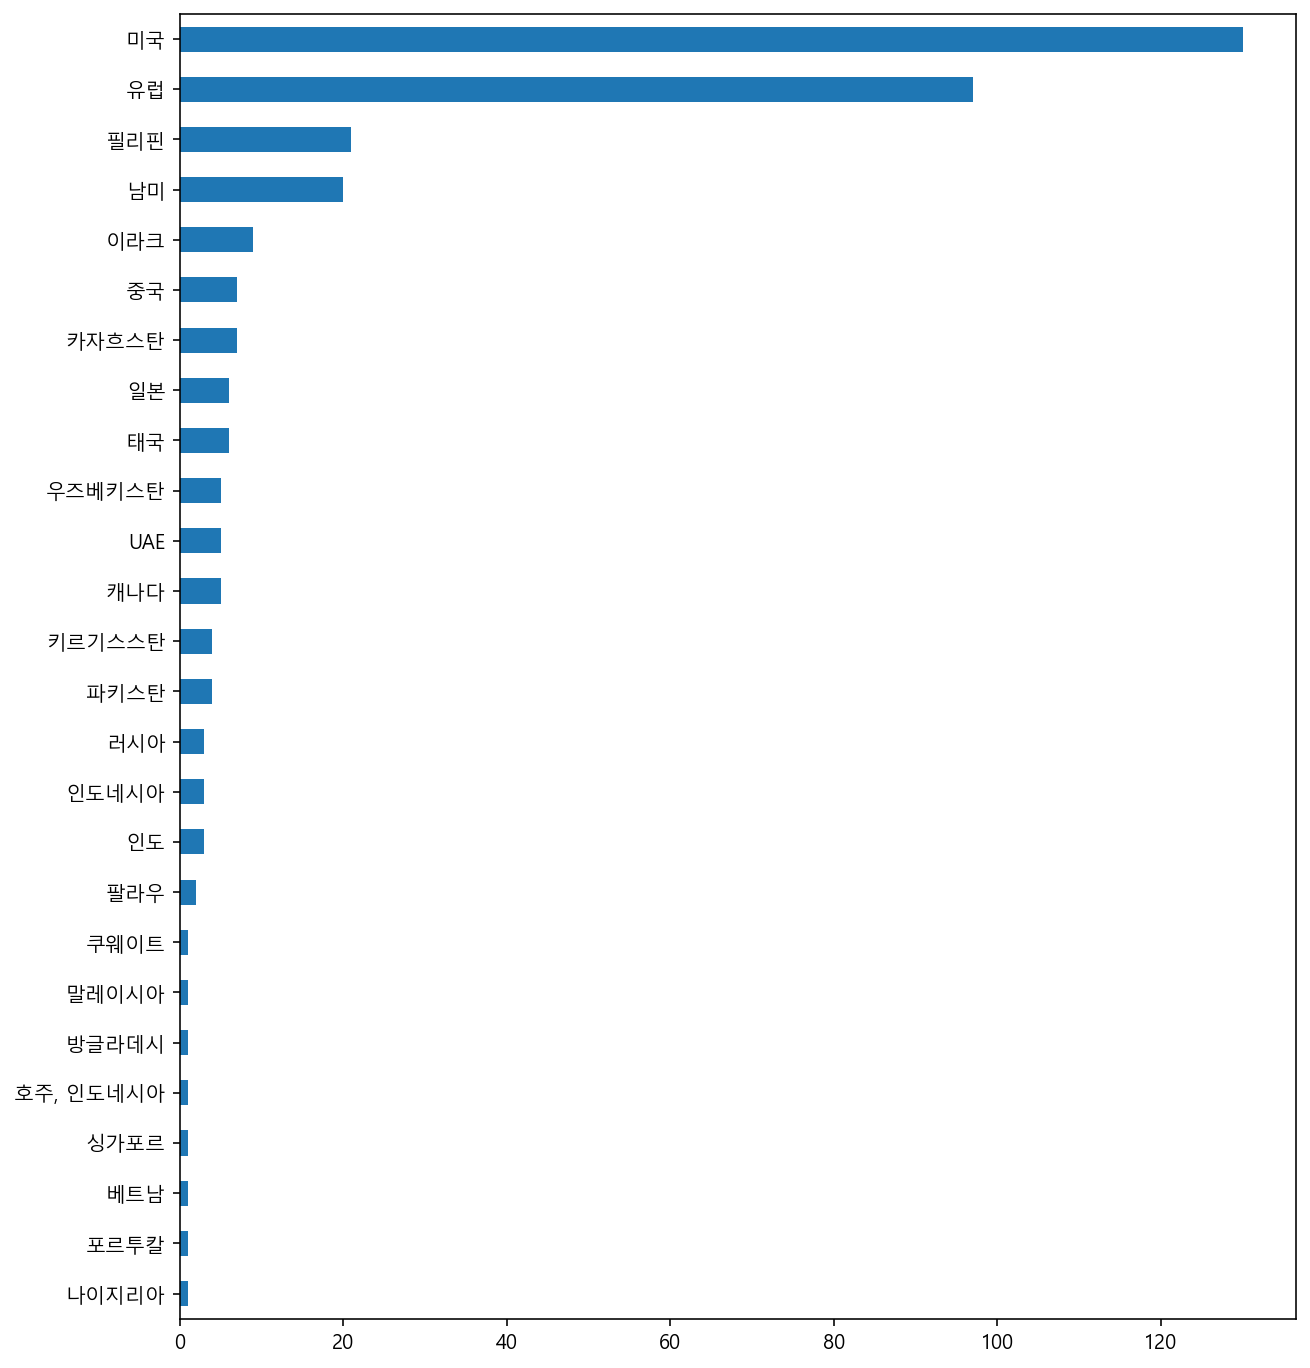

In [507]:
# 위에서 구한 빈도수를 시각화 합니다.
oversea_count.sort_values().plot.barh(figsize=(10,12))

In [508]:
# 확진일자, 해외 별 카운트 수를 구합니다.

day_oversea = df_oversea.groupby(["확진일자", "해외"])["연번"].count()
day_oversea.head()

확진일자        해외  
2020-01-24  중국      1
2020-01-30  중국      2
2020-02-02  중국      1
2020-02-05  싱가포르    1
2020-02-06  중국      1
Name: 연번, dtype: int64

In [509]:
# 위에서 구한 값을 바탕으로 지역별 누적 확진수를 구합니다.
day_oversea = day_oversea.groupby(level=[1]).cumsum()
day_oversea

확진일자        해외    
2020-01-24  중국          1
2020-01-30  중국          3
2020-02-02  중국          4
2020-02-05  싱가포르        1
2020-02-06  중국          5
                     ... 
2020-07-27  남미         20
            유럽         97
            키르기스스탄      4
2020-07-28  러시아         3
            미국        130
Name: 연번, Length: 196, dtype: int64

In [510]:
# 위에서 구한 값을 reset_index()를 통해 데이터프레임으로 만들고 "연번" 컬럼을 "확진자수"로 변경

df_day_oversea = day_oversea.reset_index()
df_day_oversea = df_day_oversea.rename(columns={"연번":"누적확진수"})
df_day_oversea.head()

,확진일자,해외,누적확진수
0,2020-01-24,중국,1
1,2020-01-30,중국,3
2,2020-02-02,중국,4
3,2020-02-05,싱가포르,1
4,2020-02-06,중국,5


In [511]:
# 그래프를 그리기 위해 확진자수 상위 10개 국가로 추린다.

country = oversea_count.head(10).index
country

Index(['미국', '유럽', '필리핀', '남미', '이라크', '중국', '카자흐스탄', '일본', '태국', 'UAE'], dtype='object')

In [512]:
df_day_oversea_10 = df_day_oversea[df_day_oversea["해외"].isin(country)]
df_day_oversea_10


,확진일자,해외,누적확진수
0,2020-01-24,중국,1
1,2020-01-30,중국,3
2,2020-02-02,중국,4
4,2020-02-06,중국,5
5,2020-02-07,중국,6
...,...,...,...
189,2020-07-26,이라크,9
190,2020-07-26,필리핀,21
191,2020-07-27,남미,20
192,2020-07-27,유럽,97


In [513]:
df_days

,확진일자
0,2020-01-24
1,2020-01-25
2,2020-01-26
3,2020-01-27
4,2020-01-28
...,...
185,2020-07-27
186,2020-07-28
187,2020-07-29
188,2020-07-30


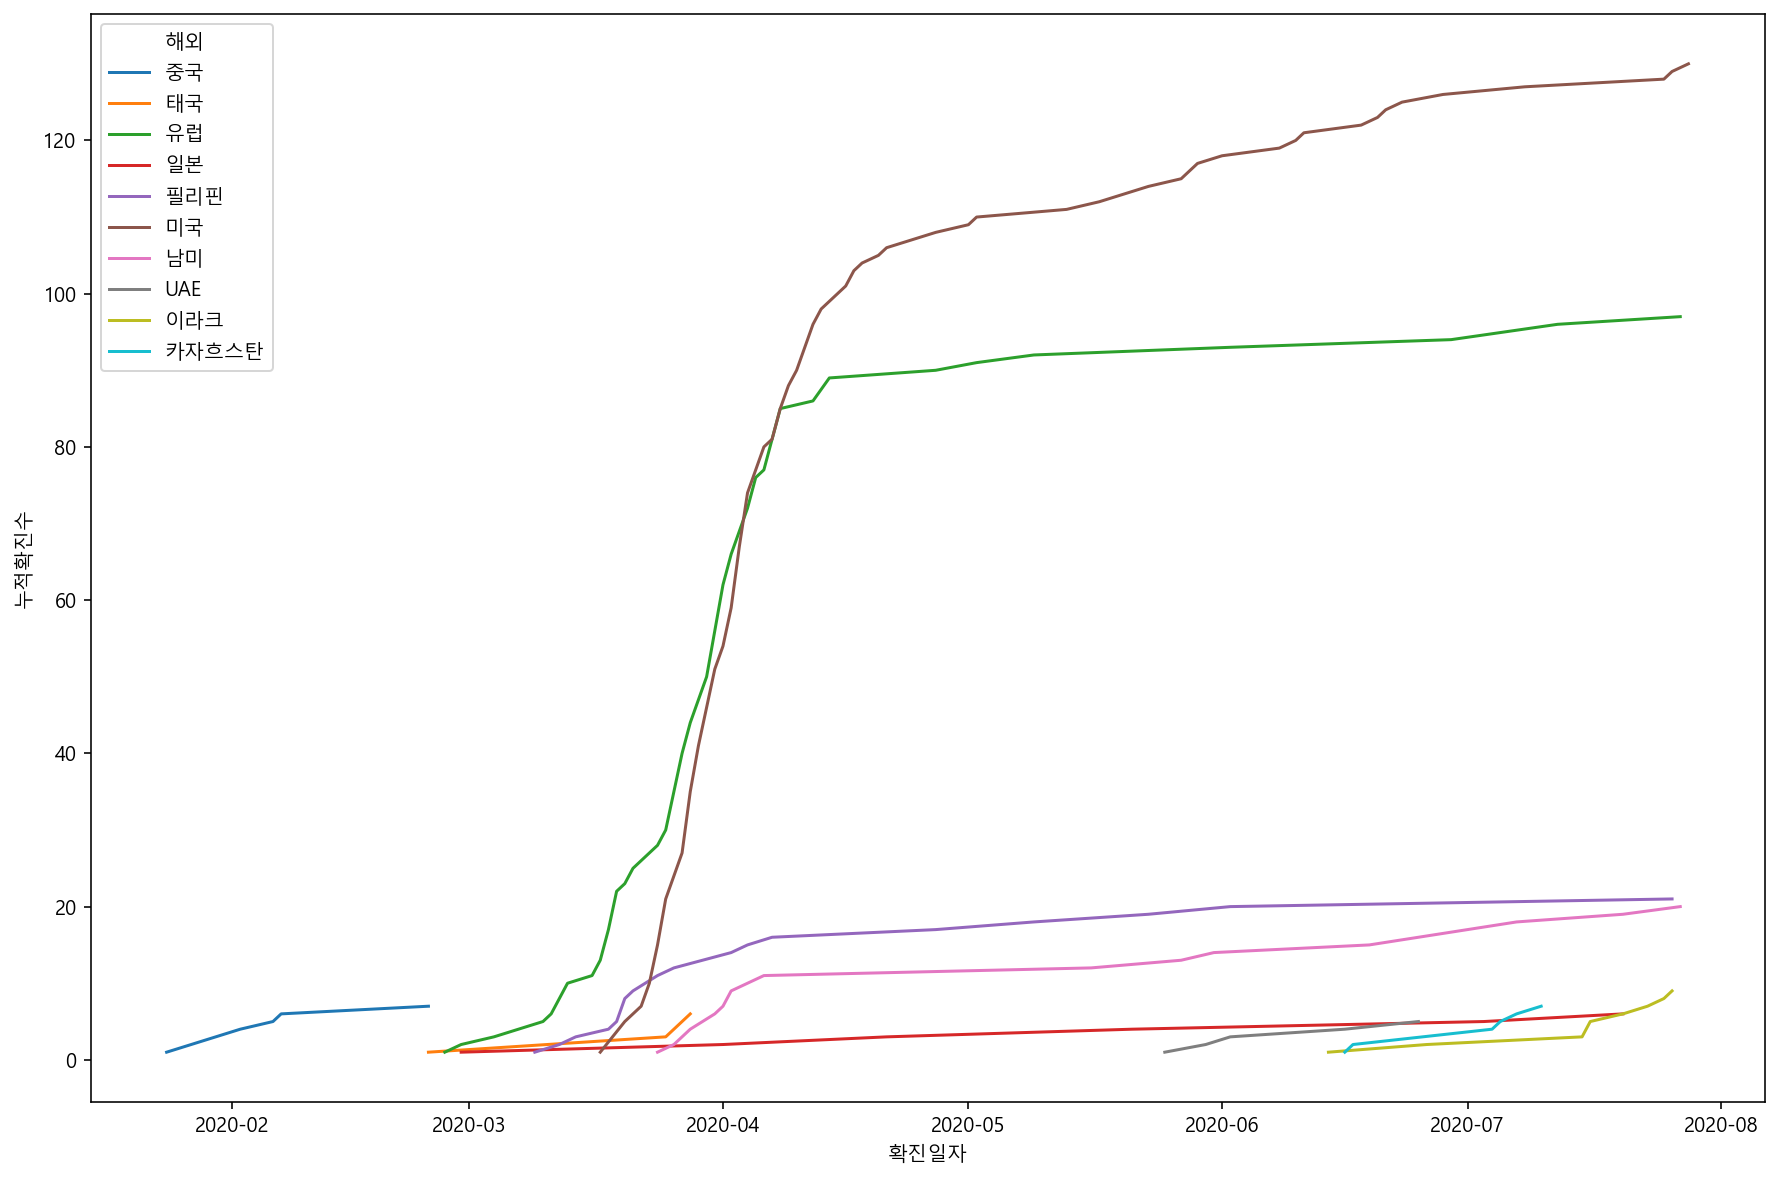

In [514]:
plt.figure(figsize=(15,10))
sns.lineplot(data= df_day_oversea_10, x= "확진일자", y= "누적확진수", hue="해외")



초기에는 중국, 2월말 부터 미국, 유럽에서 유입되다가 3월 중순부터 가파르게 확진자수 상승.

In [515]:
oversea_count_gu = df_oversea["지역"].value_counts()
oversea_count_gu.head()

강남구    41
서초구    29
타지역    26
송파구    24
마포구    22
Name: 지역, dtype: int64

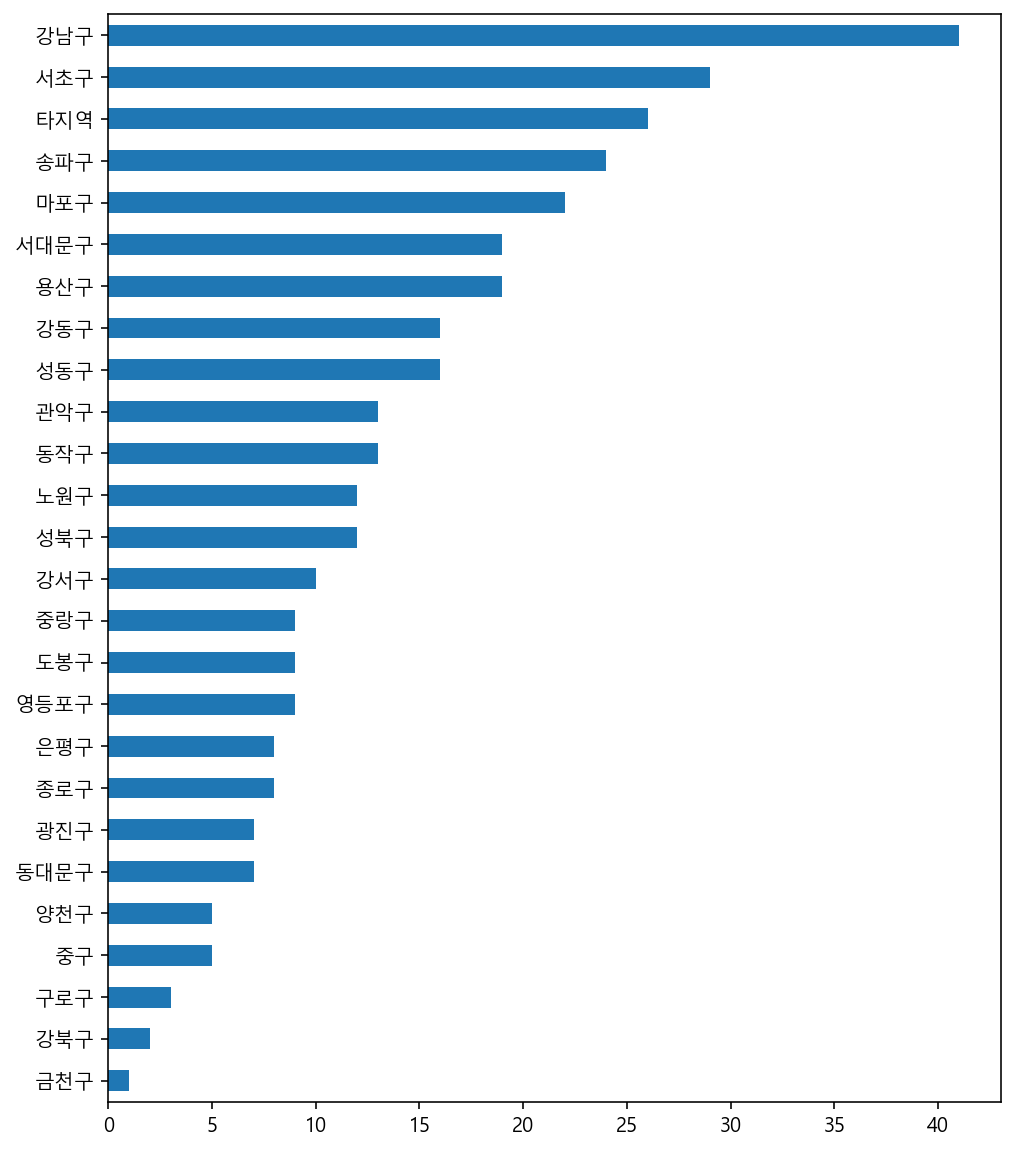

In [516]:
# "해외유입 구별 확진자" 시각화
oversea_count_gu.sort_values().plot.barh(figsize=(8,10))

## 전체확진수와 해외유입 확진수 비교

In [517]:
# all_count_gu 변수에 전체 지역의 확진자수 구하기
all_count_gu = df["지역"].value_counts()
all_count_gu

관악구    144
강서구    103
송파구     99
강남구     98
타지역     93
      ... 
금천구     39
강북구     28
종로구     28
광진구     22
중구      20
Name: 지역, Length: 26, dtype: int64

In [518]:
# 데이터프레임으로 변환하고 컬럼명 변경하기(pd.DataFrame)
pd.DataFrame({"해외확진수" : oversea_count_gu, "전체확진수" : all_count_gu})

,해외확진수,전체확진수
강남구,41,98
강동구,16,49
강북구,2,28
강서구,10,103
관악구,13,144
...,...,...
은평구,8,64
종로구,8,28
중구,5,20
중랑구,9,44


In [519]:
# merge로 합치기 
df_all_gu = all_count_gu.to_frame()
df_all_gu.columns = ["전체확진수"]
df_all_gu.head()

,전체확진수
관악구,144
강서구,103
송파구,99
강남구,98
타지역,93


In [520]:
df_oversea_count_gu = oversea_count_gu.to_frame()
df_oversea_count_gu.columns = ["해외유입확진수"]
df_oversea_count_gu.head()

,해외유입확진수
강남구,41
서초구,29
타지역,26
송파구,24
마포구,22


In [521]:
df_all_oversea_case = df_all_gu.merge(df_oversea_count_gu, left_index=True, right_index=True)

df_all_oversea_case

,전체확진수,해외유입확진수
관악구,144,13
강서구,103,10
송파구,99,24
강남구,98,41
타지역,93,26
...,...,...
금천구,39,1
강북구,28,2
종로구,28,8
광진구,22,7


## 구별 해외유입 확진자 시각화

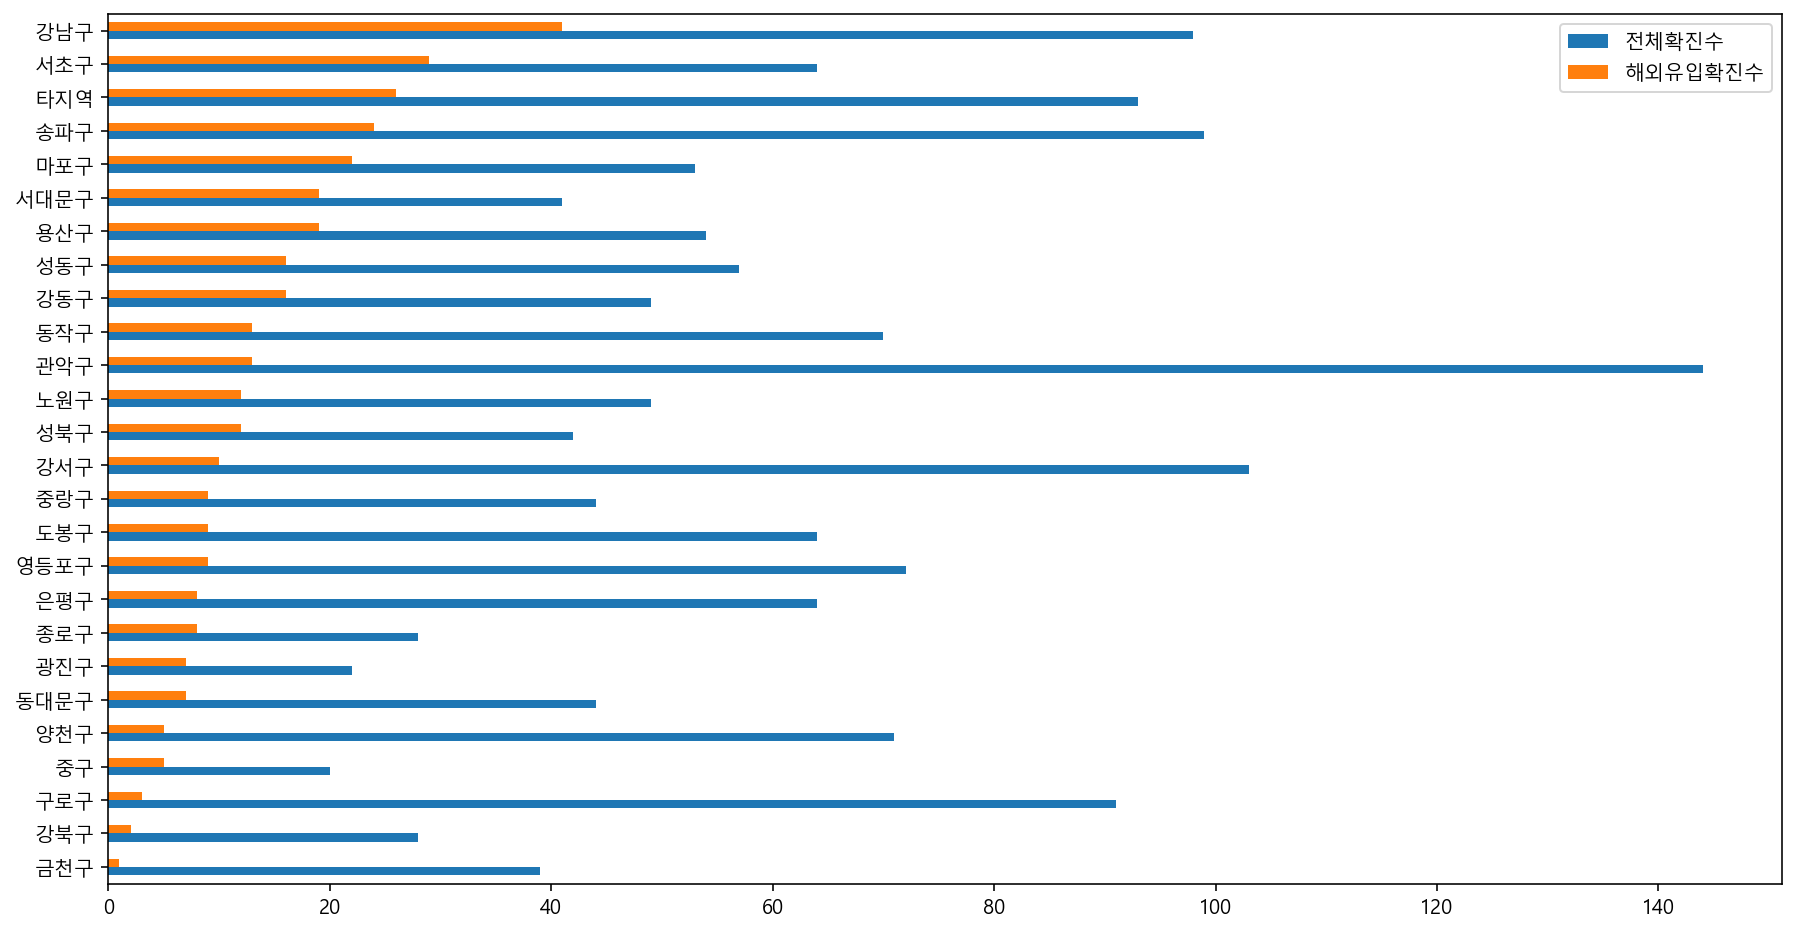

In [522]:
# 시각화 하기
df_all_oversea_case.sort_values(by="해외유입확진수").plot.barh(figsize=(15,8))

In [523]:
# 해외유입비율 구하기
df_all_oversea_case["해외유입비율"] = (df_all_oversea_case["해외유입확진수"] / df_all_oversea_case["전체확진수"]) *100
df_all_oversea_case.sort_values(by=["해외유입비율", "해외유입확진수"], ascending=False)

,전체확진수,해외유입확진수,해외유입비율
서대문구,41,19,46.341463
서초구,64,29,45.312500
강남구,98,41,41.836735
마포구,53,22,41.509434
용산구,54,19,35.185185
...,...,...,...
관악구,144,13,9.027778
강북구,28,2,7.142857
양천구,71,5,7.042254
구로구,91,3,3.296703


## 월별 해외 확진자 수

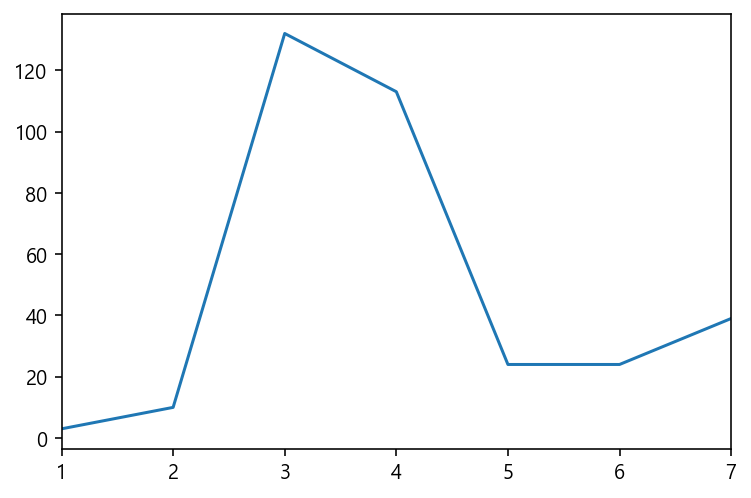

In [524]:
oversea_monthly_case = df_oversea["월"].value_counts()
oversea_monthly_case.sort_index().plot()


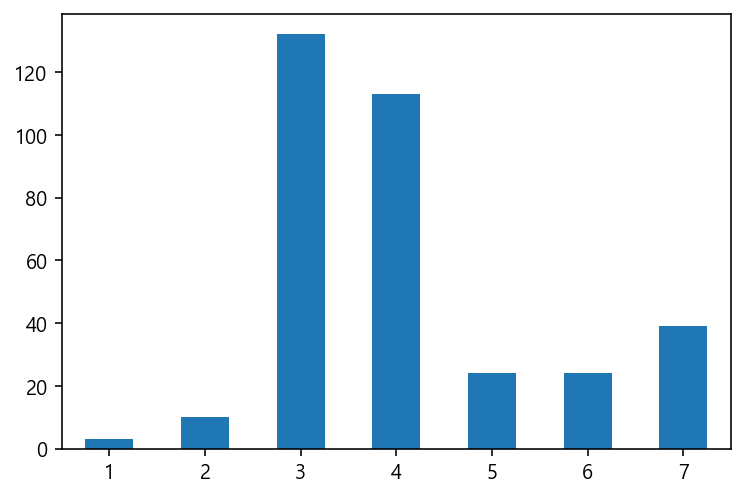

In [525]:
oversea_monthly_case.sort_index().plot.bar(rot=0)

## 구와 월별 해외 확진자 수

In [526]:
month_gu = df_oversea.groupby(["월", "지역"])["연번"].count().unstack()
month_gu = month_gu.fillna(0).astype(int)
month_gu.style.background_gradient(cmap="Greens")

지역,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,타지역
월,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,2,0,1,0,0,0,0,0,2
3,22,5,1,3,5,4,3,0,3,3,2,8,6,2,14,2,4,12,1,4,7,3,3,2,5,8
4,16,3,0,3,5,2,0,0,2,3,4,4,7,5,11,10,5,8,1,3,5,3,1,0,1,11
5,2,2,1,1,0,0,0,0,3,2,0,0,1,3,1,1,0,1,0,0,5,0,1,0,0,0
6,0,2,0,0,2,0,0,0,2,0,1,0,0,2,2,1,1,1,3,1,0,2,1,1,1,1
7,0,4,0,1,1,0,0,0,2,1,0,1,7,6,1,2,2,0,0,0,2,0,2,2,1,4


In [527]:
month_gu.T.style.background_gradient(cmap="Greens")

월,1,2,3,4,5,6,7
지역,,,,,,,
강남구,0,1,22,16,2,0,0
강동구,0,0,5,3,2,2,4
강북구,0,0,1,0,1,0,0
강서구,1,1,3,3,1,0,1
관악구,0,0,5,5,0,2,1
광진구,0,1,4,2,0,0,0
구로구,0,0,3,0,0,0,0
금천구,0,1,0,0,0,0,0
노원구,0,0,3,2,3,2,2


## 해외유입이 많은 지역(구)

In [528]:
# 해외유입이 많은 상위 10개 지역을 구한다

df_oversea_gu = df_oversea_count_gu
top_oversea_gu = df_oversea["지역"].value_counts().head(5).index

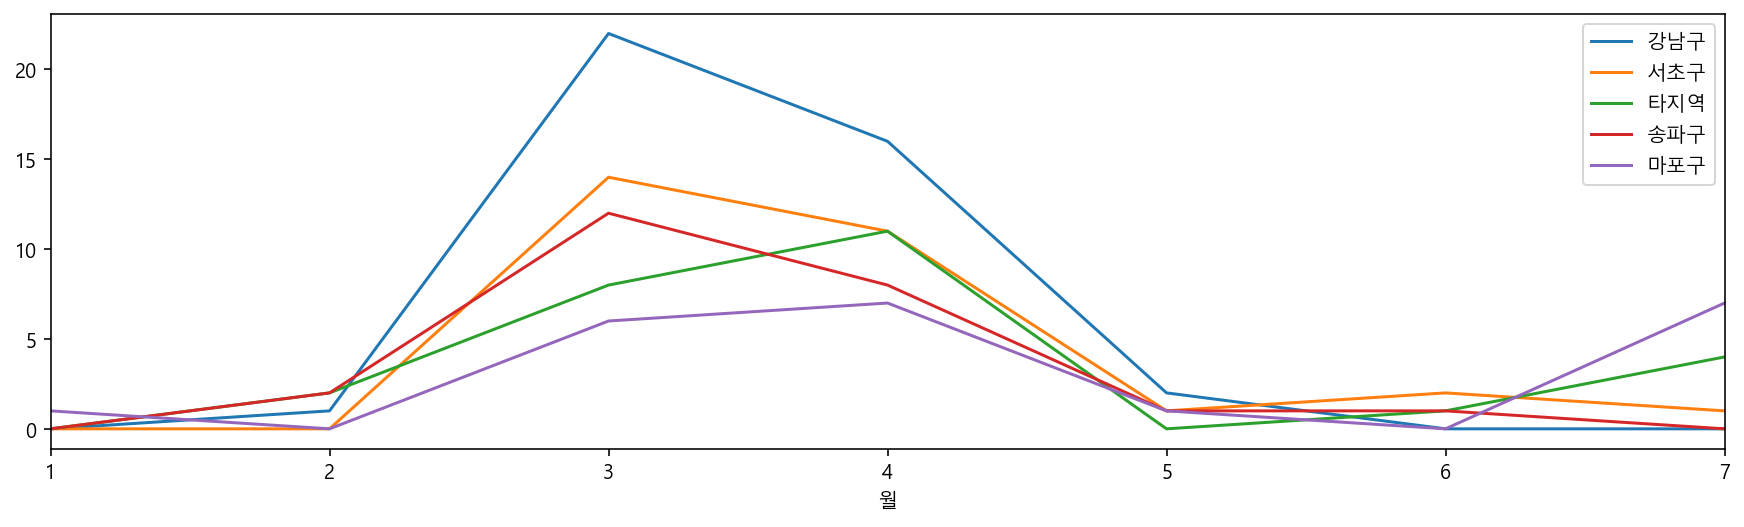

In [529]:
# 시각화하기 
g = month_gu[top_oversea_gu].plot(figsize=(15, 4))
g.legend(loc=1)

## 구별 해외유입 국가 분석하기 

In [530]:
group_oversea_gu = df_oversea.pivot_table(index="해외", columns="지역",  values="연번",
                      aggfunc="count", fill_value=0)
group_oversea_gu.style.background_gradient()

지역,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,타지역
해외,,,,,,,,,,,,,,,,,,,,,,,,,,
UAE,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0
나이지리아,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
남미,2,0,0,0,0,0,0,0,1,0,1,0,5,2,1,1,0,1,0,0,0,2,0,1,0,3
러시아,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
말레이시아,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
미국,22,5,1,4,4,2,1,0,2,3,2,3,5,4,17,9,7,11,3,2,4,1,3,0,4,11
방글라데시,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
베트남,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
싱가포르,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


### 일부 구만 따로 보기 
* 전체는 어누 많기 때문에 특정 구만 따로 봅니다. 

In [531]:
# 강남 3구의 입국자는 해외 어느 지역에서 입국했나?
group_oversea_gu.loc[["미국", "유럽", "중국", "남미"],["강남구", "서초구", "송파구"]].style.background_gradient()

지역,강남구,서초구,송파구
해외,,,
미국,22,17,11
유럽,13,10,8
중국,0,0,0
남미,2,1,1


In [532]:
# top_oversea_gu 에따른 확진자 수 보기
group_oversea_gu.loc[:,top_oversea_gu].style.background_gradient()

,강남구,서초구,타지역,송파구,마포구
해외,,,,,
UAE,0,0,0,1,0
나이지리아,0,0,0,0,0
남미,2,1,3,1,5
러시아,1,0,0,0,1
말레이시아,0,0,0,0,0
미국,22,17,11,11,5
방글라데시,1,0,0,0,0
베트남,0,0,0,0,0
싱가포르,0,0,0,1,0


강남, 서초, 송파는 미국이. 마포구는 유럽 유입자가 많다.